# 프로야구 투수의 연봉 예측 과제

> __1983-1988년에 활동했던 최동원 선수가 2015-2020년에 활동 했다면 얼마의 연봉을 받을 수 있을까??__


- 연봉을 예측을위한 머신러닝 알고리즘으로 다중회귀분석을 사용한다.

$~~~~~~~\Large {y = \theta_0 + \theta_1x_1 + \theta_2x_2 + \cdots + \theta_nx_n}$

- 연봉이라는 결과값을 도출하기 위한 독립변수로 투수의 성적을 나타내는 지표들($x_1,~x_2,~\cdots,~x_n$)을 Features로 사용한다.

- 우선 투수의 성적을 나타내는 지표들로 무엇을 사용해야 할지 알기 위해 각각의 지표에 대한 의미 조사가 필요했다.

- 2개의 논문을 참조하여 어떤 특성들을 컬럼으로 쓰면 좋은지 확인해 보았다.

1. 한양대 글로벌스포츠산업학과 전홍권님 논문 : [한국프로야구 투수 연봉 평가 척도에 영향을 미치는 경기력 변수 분석](https://repository.hanyang.ac.kr/handle/20.500.11754/124799)

2. 서울대 체육교육과 황수웅님 논문 : [프로야구 선수의 가치 평가 요인 탐색(연봉 결정요인 분석)](https://s-space.snu.ac.kr/bitstream/10371/142067/1/000000150483.pdf)

	

👉 결론

- 두 개의 그룹으로 특성 데이터를 나누어 모델링을 시도해 보기로 했다.<br></br>

1. **투수의 경기력을 측정한 전통적인 방식의 기존 지표(통산 기록) 활용**

	- 출장 (`G`)		 출장 경기, 게임 횟수 <br></br>
	- 완투 (`CG`)		 선발투수가 경기의 모든 이닝을 던졌을 때 <br></br>
	- 완봉 (`SHO`)		 선발투수가 경기의 모든 이닝을 무실점으로 던졌을 때 <br></br>
	- 선발 (`GS`, starting pitcher) <br></br>
	- 승 (`W`, win) <br></br>
	- 패 (`L`, lose) <br></br>
	- 세이브 (`SV`, save) - 마무리 투수를 평가할 때 많이 사용하는 지표로, 역전을 허용하지 않고 경기를 마무리했을 때 주어지는 기록 <br></br>
	- 홀드 (`HLD`, hold) - 구원 투수가 세이브 요건을 충족했으나, 경기 종료 전에 물러났을 경우 부여하는 기록 <br></br>
	- 이닝 (`IP`, inning piched) - 투수의 투구 이닝수 <br></br>
	- 실점 (`R`, runs) - 득점 당한 갯수 <br></br>
	- 자책 (`ER`, earned run) - 투수가 허용한 자책점 (안타, 희생플라이, 희생타, 사사구, 폭투, 야수선택, 도루에 의해 책임주자가 득점을 한 경우) <br></br>
	- 타자 (`TBF`) - 상대타자수 <br></br>
	- 안타 (`H`, hits) - 피안타, 안타를 맞은 갯수 <br></br>
	- 홈런 (`HR`, home runs) - 홈런을 맞은 개수 <br></br>
	- 볼넷 (`BB`, bases on balls) - 볼 넷의 갯수(볼넷이 많을 수록 제구를 의심) <br></br>
	- 고4 (`IBB`) - 고의 사구의 수 <br></br>
	- 사구 (`HBP`, hit by pitch) - 타자 몸에 맞는 데드볼 <br></br>
	- 삼진 (`SO`, strike out) - 탈삼진, 삼진 아웃 수 <br></br>
	- 보크 (`BK`, baulk(balk)), 부정 투구 동작으로 인한 반칙 행위, 주자는 한 루씩 안전 진루권 획득
		- 투수판에 선 투수가 투구 동작에 들어간 뒤 투구를 하지 않을 경우
		- 투수판에 선 투수가 1루에 송구하는 흉내만 내고 송구를 하지 않을 경우
		- 투수판에 선 투수가 견제를 할 때 견제를 하려는 루의 방향으로 발을 정확히 내딛지 않고 던진 경우 등 <br></br>
	- 폭투 (`WP`, wild pitch) - 투수가 던진 공이 원바운드, 혹은 노바운드로 포수의 글러브에 들어가지 않는 경우 <br></br>

2. **기존 지표에 비해 정교하고 세분화된 투수의 세이버메트릭스(Sabermetrics) 지표 활용**

	$~❕~$ 세이버메트릭스는 야구 경기에서 발생하는 기록들을 활용하여 통계적, 수학적으로 분석하는 기법으로, </br>
	$~~~~$ 그 목적은 선수의 가치와 경기력을 정량화하는 것이다. <br></br>
	$~❕~$ 각종 세이버메트릭스(sabermetrics) 지표는 투수 평가에 중요한 잣대가 되고 있다. <br></br>
	$~❕~$ 다년간 축적한 통계 데이터를 분석하는 것으로 팀의 도움과 같은 외적 요소와 무관하게 투수 자신의 책임으로 이루어진 통계량이다.<br></br>
	$~❕~$ 세이버메트릭스는 득점 및 승리와의 상관관계가 높은 만큼 이에 기초하여 파생된 지표를 활용하여 선수의 능력을 평가한다. </br>
	$~~~~$ 이것은 기존 지표를 활용하는 것 보다 더 합리적이다.<br></br>

	- `WAR`【Wins Above Replacement, 대체 선수 대비 승리 기여】 : 선수가 팀 승리에 얼마나 기여했는지 알 수 있는 지표로 높을수록 팀 기여도가 높다.

	- `ERA`【Earned Run Average, 평균자책점, 방어율 = (총자책점$\,\times\,9$) / 등판 이닝 수】:

		투수에게만 해당되는 확률로, 낮을 수록 투수가 점수를 허용하지 않았다는 뜻이다.</br>
		투수를 평가하는 대표적인 지표로, 9이닝 당 자책점을 의미한다.<br></br>

	- `FIP`【Fielding Independent Pitching, 수비 무관 추정 평균 자책점 = {(13×피홈런 + 3×(볼넷-고4+사구) - 2×삼진) / 이닝} + C(보통 3.20, 리그 ERA에 맞게 조정)】

		- 홈런, 삼진을 제외한 인플레이 타구는 투수기록에 투수 외적인 수비능력이 반영된다.</br>
		- 이러한 BABIP와 달리 투수가 통제가능한 영역만으로 투수를 평가하는 지수이다.<br>
		- FIP는 투수가 통제가능한 영역인 삼진, 볼넷, 홈런기록만으로 투수의 능력을 나타낸다. </br>
		- 팀의 수비능력이 반영되는 지수인 ERA와 같은 형태로 나타내기에, 투수의 독립적인 경기력을 ERA와 비교하여 쉽게 살펴볼 수 있다는 장점이 있다.
		- C는 Constant의 약자로 리그 ERA와 비슷한 값을 갖도록 더해주는 상수이다. 일반적으로 3.20 정도의 값을 더해준다.	<br></br>


	- `ERA+`【조정 평균자책점 = (득점 파크팩터 적용 평균자책점) / (리그 평균자책점)】 : 리그 평균자책점 대비 우위를 보여주는 비율지표.

		- 100이 평균이며, 높을수록 좋은 투수라고 입증할 수 있다.<br></br>

	- `FIP+` = (득점 파크팩터 적용 FIP) / (리그 평균 실점율) : ERA+와 같은 조정지표이자 비율지표

		- 리그 평균 실점율 대비 우위를 보여주는 지표로 100이 평균이며, 높을수록 좋은 투수라고 입증할 수 있다.<br></br>

	- `K/9` = 탈삼진×9 / 이닝 : 9이닝 동안의 탈삼진 개수로, 9이닝을 기준으로 하였기에 선발투수의 삼진 능력을 평가하는 기준이 된다.

		- 9를 곱하는 이유는 9이닝을 던졌을 때를 기준으로 보기 위함이다. <br></br>

	- `BB/9` = 볼넷×9 / 이닝 : 9이닝 동안 허용한 볼넷의 개수를 의미로, 투수의 제구력을 평가하는 기준으로 쓰인다.<br></br>

	- `K/BB` = 탈삼진 / 볼넷<br></br>

	- `HR/9` = 홈런×9 / 이닝<br></br>

	- `K%` = 삼진 / 상대타자<br></br>

	- `BB%` = 볼넷 / 상대타자<br></br>

	- `PFR` = (삼진+볼넷) / 이닝<br></br>

	- `BABIP`【, 인플레이된 타구의 비율 = (안타-홈런) / (타수-삼진-홈런+희비)】 

		- 인플레이로 이어진 타구에 대한 타율을 계산하는 수치이다.
	    - 홈런, 삼진을 제외한 인플레이 타구는 수비수의 능력이 투수 평가에 영향을 미치기에 BABIP가 야구 통계학자들에 의해 고안되었다. 
		- 투수의 경우 해당 수치가 리그 평균보다 높으면 수비의 도움을 받지 못한 것으로 판단할 수 있다.<br></br>

	- `LOB%`【, 잔루율 = (안타+볼넷+사구-실점) / (안타+볼넷+사구-(1.4×홈런))】<br></br>

	- `WHIP`【Walks plus Hits divided by Innings Pitched, 이닝 당 출루 허용률, 이닝 당 평균 출루율 = (볼넷+피안타) / 이닝】

		- 피안타와 볼넷 허용 개수를 이닝으로 나눈 수치이다. 
		- 단순한 계산으로 쉽게 투수의 성적을 쉽게 이해하고 평가할 수 있기에 최근 야구 중계 방송에 자주 나타나는 기록이다. 
		- 하지만 몸에 맞는 볼과 장타를 평가 요소에서 배제했다는 비판 또한 따른다.<br></br>

	- `WHIP+`【, = (볼넷+사구+피안타) / 이닝】<br></br>

	- `WPCT`【winning percentage, 승률 = 승W / (승W + 패L)】 - 게임 횟수에서 승리한 경기 기록 <br></br>

	- `IP/G` (경기당 이닝)

<br></br>

| No. | 전통적 지표 | 설명 || No. | 세이버베트릭스 지표 | 설명 |
|:---:|:----------:|:----|-|:---:|:-----------------:|:-----|
|  1 | 출장 `G`  | 출장 경기(게임) 횟수 ||  1 | `WAR` | 대체 선서 대비 승리 기여도 |
|  2 | 완투 `CG` | 선발투수가 경기의 모든 이닝을 던졌을 때 ||  2 | `ERA` | 방어율, 평균 자책점 |
|  3 | 완봉 `SHO`| 완투를 무실점으로 했을 때 ||  3 | `FIP` | 수비 무관 추정 평균 자책점 |
|  4 | 선발 `GS` | starting pitcher ||  4 | `ERA+` | 리그 평군 자책점 대비 우위를 보여주는 지표 |
|  5 |  승  `W`  | win ||  5 | `FIP+` | 리그 평균 실점율 대비 우위를 보여주는 지표 |
|  6 |  패  `L`  | lose ||  6 | `K/9` | 9이닝 당 탈삼진 개수 |
|  7 |  세  `SV` | 역전을 허용하지 않고 경기 마무리 ||  7 | `BB/9` | 9이닝 당 볼넷 개수 |
|  8 | 홀드 `HLD`| 세이브 조건을 충족하고 경기 종료 전에 물러난 경우 ||  8 | `K/BB` | 탈삼진/볼넷 비율 |
|  9 | 이닝 `IP` | 투구 이닝수 ||  9 | `HR/9` | 9이닝 당 홈런 수 |
| 10 | 실점 `R`  | 득점 당한 개수 || 10 | `K%` | 타자 당 삼진 비율 |
| 11 | 자책 `ER` | 투수가 혀용한 자책점	|| 11 | `BB%` | 타자 당 볼넷 비율 |
| 12 | 타자 `TBF`| 상대 타자 수 || 12 | `PFR` | 이닝 당 삼진 & 볼넷 수 |
| 13 | 안타 `H`  | 안타 맞은 갯수 || 13 | `BABIP` | 인플레이된 타구 비율 |
| 14 | 홈런 `HR` | 홈런 맞은 갯수 || 14 | `LOB%` | 잔루율 |
| 15 | 볼넷 `BB` | 볼 넷 개수 || 15 | `WHIP` | 이닝 당 출루 허용률 |
| 17 | 고4 `IBB` | 고의 사구 수 || 16 | `WPCT` | 숭률 |
| 18 | 사구 `HBP`| 타자 몸에 맞는 데드볼 || 17| `IP/G` | 경기당 이닝 수 |
| 19 | 삼진 `SO` | 삼진 아웃 수 ||
| 20 | 보크 `BK` | 부정 투구 동작 ||
| 21 | 폭투 `WP` | wild pitch ||


<br></br>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 25)

<br></br>

# 문제 1. Dataset

> 우리 과제는 최동원의 롯데 시절 1983년부터 1988년의 데이터를 사용하도록 하겠습니다.
> 최동원의 당시 데이터와 함께 1983년부터 1988년 사이 투수들의 데이터(연봉포함)를 구하고, 2015년부터 2020년까지 프로야구의 투수들의 데이터를 구하시오.
>
> 모든 투수의 데이터를 구하기 어려울 수도 있습니다. 모두 구할 필요는 없습니다.
> 그러나 선발/마무리에 대해서는 고민하기 바랍니다. 왜냐하면 최동원은 선발로도, 혹은 마무리로도 활동을 했기 때문입니다.

</br>

- 데이터 출처 : [STATIZ](http://www.statiz.co.kr/) <br></br>

- `1983 ~ 1988`

	- 1983~1988년의 프로야구 선수의 연봉 자료는 따로 데이터 셋을 구하지 못했고 기사 정도 참조하였다.

	- 최동원 선수는 85년부터 90년도까지 최고 연봉의 선수로 기록되어 있었다. (신인과 외국인 선수는 제외)

	- 당시 억대 연봉을 받은 일본인 선수(장명부-1억484)가 있었지만 최고 연봉 산정 데이터에서는 제외되어 있었다.

	- 그래서 1983년부터 1988년까지의 최고 연봉 선수에 대한 데이터 정도만 활용할 예정이다. <br></br>

- `2015 ~ 2020`

	- STATIZ에 기록이 테이블 형태로 되어 있어 HTML 테이블로 크롤링

	- KBO에서 발표하는 연봉 협상 결과는 매년 3월에 이루어진다.

	- 2015년의 연봉은 이전 해인 2014년도의 경기력을 기준으로 산정되었다고 미루어 짐작할 수 있다.

	- 그러므로 투수의 경기력 지표는 2014년부터 2019년까지의 데이터를 가져오고, 여기에 2015~2020 연봉 데이터를 매핑한다.

	- KBO에서 매년 발표되는 연봉의 평균은 신인과 외국인 선수는 제외되어 있다. 그러므로 모든 데이터는 국내 선수를 기준한다.

		- 외국인은 화폐의 단위가 달라 연봉 산정 기준이나 적용 규약이 다르게 적용된다. 그러므로 데이터에서 외국인 선수는 제외한다.
		
			국외선수는 (연간계약금 + 연봉)으로 계약하고 달러 화폐단위를 사용한다.

	- 매년 KBO에 등록된 투수는 평균 250명 가량되나 STATIZ에서 연봉 데이터를 얻을 수 있는 선수만을 대상으로 한다.


</br>

## 📌 1983 ~ 1988

<img src="https://github.com/sunshinetree21/Study_Machine_Learning/assets/162138440/8384ad2d-4a61-40cd-a098-8e53724d0303">

</br>

### ◾ Pitcher Features Group 1.

In [4]:
url = "http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys=1982&ye=1988&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&da=1" \
    	"&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa=0&si=&cn=&pl=%EB%B0%95%EC%B2%A0%EC%88%9C%2C+%EC%B5%9C%EB%8F%99%EC%9B%90"

raw_df = pd.read_html(url)[0]
raw_df = raw_df.droplevel(0, axis=1)
raw_df

,순,이름,팀,WAR,출장,완투,완봉,선발,승,패,세,홀드,...,고4,사구,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,WPA
0,1,최동원,86롯,11.74,39,17,4,21,19,14,2,0,...,5,6,208,0,2,1.55,1.49,0.97,191.8,200.0,11.74,NaN
1,2,최동원,85롯,9.88,42,14,4,17,20,9,8,0,...,2,8,161,1,3,1.92,1.82,0.94,177.6,187.7,9.88,NaN
2,3,최동원,84롯,9.72,51,14,1,20,27,13,6,0,...,1,14,223,0,3,2.40,2.25,1.04,135.4,144.6,9.72,NaN
3,4,박철순,82O,9.54,36,15,2,19,24,4,7,0,...,1,6,108,0,4,1.84,2.82,0.97,211.2,137.8,9.54,NaN
4,5,최동원,87롯,7.15,32,15,4,22,14,12,2,0,...,2,7,163,0,3,2.81,2.24,1.25,125.6,157.5,7.15,NaN
5,6,최동원,83롯,5.00,38,16,1,21,9,16,4,0,...,2,8,148,0,3,2.89,2.52,1.21,114.2,131.1,5.00,NaN
6,7,최동원,88롯,3.86,16,3,1,4,7,3,3,0,...,3,1,83,1,1,2.05,2.00,1.21,186.6,191.3,3.86,NaN
7,8,박철순,85O,1.46,9,2,0,5,1,4,0,0,...,0,2,34,0,1,2.68,2.34,0.99,132.9,152.6,1.46,NaN
8,9,박철순,86O,0.76,13,1,1,7,5,3,0,0,...,0,0,29,0,4,3.54,2.96,1.28,83.9,100.5,0.76,NaN
9,10,박철순,87O,0.75,5,1,0,3,2,0,1,0,...,0,0,11,0,0,2.25,2.68,1.08,152.8,128.5,0.75,NaN


In [5]:
pch_80_df = raw_df['이름'].to_frame()

In [6]:
def get_year_team(row):
    year = int(row['팀'][:2]) + 1901
    pch_80_df.loc[row.name, '연도'] = year
    raw_df.loc[row.name, '연도'] = year
    
    team = row['팀'][2:]
    if team == '롯':
        pch_80_df.loc[row.name, '팀'] = '롯데'
    elif team == 'O':
        pch_80_df.loc[row.name, '팀'] = 'OB'

raw_df.apply(get_year_team, axis=1)
raw_df['연도'] = raw_df['연도'].astype("int")
raw_df.sort_values(by='연도', inplace=True)
raw_df.drop(index=raw_df[(raw_df['이름']=='박철순') & (raw_df['연도']>1985)].index, inplace=True)
raw_df.drop(index=raw_df[(raw_df['이름']=='최동원') & (raw_df['연도']==1984)].index, inplace=True)
raw_df

,순,이름,팀,WAR,출장,완투,완봉,선발,승,패,세,홀드,...,사구,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,WPA,연도
3,4,박철순,82O,9.54,36,15,2,19,24,4,7,0,...,6,108,0,4,1.84,2.82,0.97,211.2,137.8,9.54,NaN,1983
10,11,박철순,83O,0.26,4,0,0,4,0,1,0,0,...,0,4,0,0,3.48,2.44,1.36,94.0,133.9,0.26,NaN,1984
2,3,최동원,84롯,9.72,51,14,1,20,27,13,6,0,...,14,223,0,3,2.40,2.25,1.04,135.4,144.6,9.72,NaN,1985
1,2,최동원,85롯,9.88,42,14,4,17,20,9,8,0,...,8,161,1,3,1.92,1.82,0.94,177.6,187.7,9.88,NaN,1986
0,1,최동원,86롯,11.74,39,17,4,21,19,14,2,0,...,6,208,0,2,1.55,1.49,0.97,191.8,200.0,11.74,NaN,1987
4,5,최동원,87롯,7.15,32,15,4,22,14,12,2,0,...,7,163,0,3,2.81,2.24,1.25,125.6,157.5,7.15,NaN,1988
6,7,최동원,88롯,3.86,16,3,1,4,7,3,3,0,...,1,83,1,1,2.05,2.00,1.21,186.6,191.3,3.86,NaN,1989


In [7]:
pch_80_df['연도'] = pch_80_df['연도'].astype("int")
pch_80_df.sort_values(by='연도', inplace=True)
pch_80_df.drop(index=pch_80_df[(pch_80_df['이름']=='박철순') & (pch_80_df['연도']>1985)].index, inplace=True)
pch_80_df.drop(index=pch_80_df[(pch_80_df['이름']=='최동원') & (pch_80_df['연도']==1984)].index, inplace=True)
pch_80_df

,이름,연도,팀
3,박철순,1983,OB
10,박철순,1984,OB
2,최동원,1985,롯데
1,최동원,1986,롯데
0,최동원,1987,롯데
4,최동원,1988,롯데
6,최동원,1989,롯데


In [9]:
salarys = [3200, 3200, 3437, 8100, 8910, 8910, 8390]

pch_80_df['연봉(만원)'] = salarys
pch_80_df = pch_80_df.merge(
	raw_df.iloc[:, 3:33], how='left', left_index=True, right_index=True
).reset_index(drop=True)
pch_80_df

,이름,연도,팀,연봉(만원),WAR,출장,완투,완봉,선발,승,패,세,...,고4,사구,삼진,보크,폭투,ERA,FIP,WHIP,ERA+,FIP+,WAR,WPA
0,박철순,1983,OB,3200,9.54,36,15,2,19,24,4,7,...,1,6,108,0,4,1.84,2.82,0.97,211.2,137.8,9.54,NaN
1,박철순,1984,OB,3200,0.26,4,0,0,4,0,1,0,...,0,0,4,0,0,3.48,2.44,1.36,94.0,133.9,0.26,NaN
2,최동원,1985,롯데,3437,9.72,51,14,1,20,27,13,6,...,1,14,223,0,3,2.40,2.25,1.04,135.4,144.6,9.72,NaN
3,최동원,1986,롯데,8100,9.88,42,14,4,17,20,9,8,...,2,8,161,1,3,1.92,1.82,0.94,177.6,187.7,9.88,NaN
4,최동원,1987,롯데,8910,11.74,39,17,4,21,19,14,2,...,5,6,208,0,2,1.55,1.49,0.97,191.8,200.0,11.74,NaN
5,최동원,1988,롯데,8910,7.15,32,15,4,22,14,12,2,...,2,7,163,0,3,2.81,2.24,1.25,125.6,157.5,7.15,NaN
6,최동원,1989,롯데,8390,3.86,16,3,1,4,7,3,3,...,3,1,83,1,1,2.05,2.00,1.21,186.6,191.3,3.86,NaN


In [10]:
pch_80_g1 = pch_80_df.iloc[:, :27].drop(columns=['WAR','2타','3타'])
pch_80_g1

,이름,연도,팀,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,박철순,1983,OB,3200,36,15,2,19,24,4,7,0,224.2,60,46,871,151,7,67,1,6,108,0,4
1,박철순,1984,OB,3200,4,0,0,4,0,1,0,0,10.1,4,4,43,10,0,4,0,0,4,0,0
2,최동원,1985,롯데,3437,51,14,1,20,27,13,6,0,284.2,91,76,1132,229,18,68,1,14,223,0,3
3,최동원,1986,롯데,8100,42,14,4,17,20,9,8,0,225.0,60,48,865,170,7,41,2,8,161,1,3
4,최동원,1987,롯데,8910,39,17,4,21,19,14,2,0,267.0,60,46,1039,204,7,55,5,6,208,0,2
5,최동원,1988,롯데,8910,32,15,4,22,14,12,2,0,224.0,80,70,920,218,6,61,2,7,163,0,3
6,최동원,1989,롯데,8390,16,3,1,4,7,3,3,0,83.1,24,19,349,77,4,24,3,1,83,1,1


</br>

### ◾ Pitcher Features Group 2.

In [11]:
url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=1982&ye=1988&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=&" \
      "pl=%EC%B5%9C%EB%8F%99%EC%9B%90%2C+%EB%B0%95%EC%B2%A0%EC%88%9C&da=2&o1=FIP&o2=WAR&de=0&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="

raw_df2 = pd.read_html(url)[0]
raw_df2 = raw_df2.droplevel(0, axis=1)
raw_df2

,순,이름,팀,FIP,출장,이닝,ERA,FIP,K/9,BB/9,K/BB,HR/9,...,타율,출루율,장타율,OPS,WHIP,WHIP+,투구,IP/G,P/G,P/IP,P/PA,CYP
0,1,최동원,86롯,1.49,39,267.0,1.55,1.49,7.01,1.85,3.78,0.24,...,0.215,0.262,NaN,NaN,0.97,0.99,NaN,6.9,NaN,NaN,NaN,127.3
1,2,최동원,85롯,1.82,42,225.0,1.92,1.82,6.44,1.64,3.93,0.28,...,0.214,0.257,NaN,NaN,0.94,0.97,NaN,5.4,NaN,NaN,NaN,100.6
2,3,최동원,88롯,2.00,16,83.1,2.05,2.00,8.96,2.59,3.46,0.43,...,0.244,0.298,NaN,NaN,1.21,1.22,NaN,5.2,NaN,NaN,NaN,38.0
3,4,최동원,87롯,2.24,32,224.0,2.81,2.24,6.55,2.45,2.67,0.24,...,0.262,0.317,NaN,NaN,1.25,1.28,NaN,7.0,NaN,NaN,NaN,72.3
4,5,최동원,84롯,2.25,51,284.2,2.40,2.25,7.05,2.15,3.28,0.57,...,0.224,0.280,NaN,NaN,1.04,1.09,NaN,5.6,NaN,NaN,NaN,115.6
5,6,박철순,85O,2.34,9,50.1,2.68,2.34,6.08,2.50,2.43,0.36,...,0.209,0.275,NaN,NaN,0.99,1.03,NaN,5.6,NaN,NaN,NaN,14.6
6,7,박철순,83O,2.44,4,10.1,3.48,2.44,3.48,3.48,1.00,0.00,...,0.256,0.326,NaN,NaN,1.36,1.36,NaN,2.6,NaN,NaN,NaN,1.6
7,8,최동원,83롯,2.52,38,208.2,2.89,2.52,6.38,2.20,2.90,0.73,...,0.257,0.309,NaN,NaN,1.21,1.25,NaN,5.5,NaN,NaN,NaN,61.1
8,9,박철순,87O,2.68,5,24.0,2.25,2.68,4.13,3.38,1.22,0.00,...,0.202,0.277,NaN,NaN,1.08,1.08,NaN,4.8,NaN,NaN,NaN,9.1
9,10,박철순,82O,2.82,36,224.2,1.84,2.82,4.33,2.68,1.61,0.28,...,0.191,0.259,NaN,NaN,0.97,1.00,NaN,6.2,NaN,NaN,NaN,101.1


In [12]:
def get_year(row):
    year = int(row['팀'][:2]) + 1901
    raw_df2.loc[row.name, '연도'] = year

raw_df2.apply(get_year, axis=1)
raw_df2['연도'] = raw_df2['연도'].astype("int")
raw_df2.sort_values(by='연도', inplace=True)
raw_df2.drop(index=raw_df2[(raw_df2['이름']=='박철순') & (raw_df2['연도']>1985)].index, inplace=True)
raw_df2.drop(index=raw_df2[(raw_df2['이름']=='최동원') & (raw_df2['연도']==1984)].index, inplace=True)
raw_df2.reset_index(drop=True, inplace=True)
raw_df2

,순,이름,팀,FIP,출장,이닝,ERA,FIP,K/9,BB/9,K/BB,HR/9,...,출루율,장타율,OPS,WHIP,WHIP+,투구,IP/G,P/G,P/IP,P/PA,CYP,연도
0,10,박철순,82O,2.82,36,224.2,1.84,2.82,4.33,2.68,1.61,0.28,...,0.259,NaN,NaN,0.97,1.00,NaN,6.2,NaN,NaN,NaN,101.1,1983
1,7,박철순,83O,2.44,4,10.1,3.48,2.44,3.48,3.48,1.00,0.00,...,0.326,NaN,NaN,1.36,1.36,NaN,2.6,NaN,NaN,NaN,1.6,1984
2,5,최동원,84롯,2.25,51,284.2,2.40,2.25,7.05,2.15,3.28,0.57,...,0.280,NaN,NaN,1.04,1.09,NaN,5.6,NaN,NaN,NaN,115.6,1985
3,2,최동원,85롯,1.82,42,225.0,1.92,1.82,6.44,1.64,3.93,0.28,...,0.257,NaN,NaN,0.94,0.97,NaN,5.4,NaN,NaN,NaN,100.6,1986
4,1,최동원,86롯,1.49,39,267.0,1.55,1.49,7.01,1.85,3.78,0.24,...,0.262,NaN,NaN,0.97,0.99,NaN,6.9,NaN,NaN,NaN,127.3,1987
5,4,최동원,87롯,2.24,32,224.0,2.81,2.24,6.55,2.45,2.67,0.24,...,0.317,NaN,NaN,1.25,1.28,NaN,7.0,NaN,NaN,NaN,72.3,1988
6,3,최동원,88롯,2.00,16,83.1,2.05,2.00,8.96,2.59,3.46,0.43,...,0.298,NaN,NaN,1.21,1.22,NaN,5.2,NaN,NaN,NaN,38.0,1989


In [13]:
pch_80_df2 = pch_80_df.iloc[:, [0,1,2,3,4,27,28,29,30,31]]
pch_80_df2

,이름,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+
0,박철순,1983,OB,3200,9.54,1.84,2.82,0.97,211.2,137.8
1,박철순,1984,OB,3200,0.26,3.48,2.44,1.36,94.0,133.9
2,최동원,1985,롯데,3437,9.72,2.40,2.25,1.04,135.4,144.6
3,최동원,1986,롯데,8100,9.88,1.92,1.82,0.94,177.6,187.7
4,최동원,1987,롯데,8910,11.74,1.55,1.49,0.97,191.8,200.0
5,최동원,1988,롯데,8910,7.15,2.81,2.24,1.25,125.6,157.5
6,최동원,1989,롯데,8390,3.86,2.05,2.00,1.21,186.6,191.3


In [14]:
pch_80_g2 = pch_80_df2.merge(raw_df2.iloc[:,[8,9,10,11,12,13,15,16,17,25]], how='left', left_index=True, right_index=True)
pch_80_g2['WPCT'] = round(pch_80_g1['승'] / (pch_80_g1['승']+pch_80_g1['패']), 2)
pch_80_g2

,이름,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
0,박철순,1983,OB,3200,9.54,1.84,2.82,0.97,211.2,137.8,4.33,2.68,1.61,0.28,12.4,7.7,0.78,0.213,76.6,6.2,0.86
1,박철순,1984,OB,3200,0.26,3.48,2.44,1.36,94.0,133.9,3.48,3.48,1.00,0.00,9.3,9.3,0.77,0.286,71.4,2.6,0.00
2,최동원,1985,롯데,3437,9.72,2.40,2.25,1.04,135.4,144.6,7.05,2.15,3.28,0.57,19.7,6.0,1.02,0.267,77.0,5.6,0.68
3,최동원,1986,롯데,8100,9.88,1.92,1.82,0.94,177.6,187.7,6.44,1.64,3.93,0.28,18.6,4.7,0.90,0.257,76.0,5.4,0.69
4,최동원,1987,롯데,8910,11.74,1.55,1.49,0.97,191.8,200.0,7.01,1.85,3.78,0.24,20.0,5.3,0.99,0.268,80.3,6.9,0.58
5,최동원,1988,롯데,8910,7.15,2.81,2.24,1.25,125.6,157.5,6.55,2.45,2.67,0.24,17.7,6.6,1.00,0.318,74.2,7.0,0.54
6,최동원,1989,롯데,8390,3.86,2.05,2.00,1.21,186.6,191.3,8.96,2.59,3.46,0.43,23.8,6.9,1.28,0.317,80.9,5.2,0.70


</br>

## 📌 2015 ~ 2020 

</br>

### ◾ Pitcher Features Group 1 & 2

In [15]:
def get_pitcher_features(year):
    t_raw = pd.DataFrame({})
    s_raw = pd.DataFrame({})
    
    # 결측치 처리
    if year == 2015:
        url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2012&ye=2013&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=" \
            "&pl=%EC%9C%A4%EC%84%9D%EB%AF%BC%2C+%EC%A0%95%EC%9A%B0%EB%9E%8C&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
        df = pd.read_html(url)[0]
        t_raw = pd.concat([t_raw, df.iloc[1:, :]])
        
        url = "http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys=2012&ye=2013&se=0&te=&tm=&ty=0&qu=auto&po=0&as=&ae=&hi=&un=" \
            "&pl=%EC%A0%95%EC%9A%B0%EB%9E%8C%2C%EC%9C%A4%EC%84%9D%EB%AF%BC&da=2&o1=FIP&de=0&o2=WAR&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
        df = pd.read_html(url)[0]
        s_raw = pd.concat([s_raw, df.iloc[[0,2], :]])
    
    # 투수 평가 지표 가져오기
    for n in range(0, 300, 100):
        # feature Group 1.
        url = f"http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys={year-1}&ye={year-1}&se=0&te=&tm=&ty=0&qu=auto&po=0" \
              f"&as=&ae=&hi=&un=&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&pa={n}&si=&cn="
        t_raw = pd.concat([t_raw, pd.read_html(url)[0]])
        
        # feagure Group 2.
        url = f"http://www.statiz.co.kr/stat.php?mid=stat&re=1&ys={year-1}&ye={year-1}&se=0&te=&tm=&ty=0&qu=all&po=0" \
              f"&as=&ae=&hi=&un=&pl=&da=2&o1=FIP&o2=WAR&de=0&lr=0&tr=&cv=&ml=2&sn=100&pa={n}&si=&cn="
        s_raw = pd.concat([s_raw, pd.read_html(url)[0]])
    
    # 이중컬럼 [0] level 제거
    t_raw = t_raw.droplevel(0, axis=1)
    s_raw = s_raw.droplevel(0, axis=1)
    
    
    # 외국인 선수 제외
    url = f"http://www.statiz.co.kr/stat.php?opt=0&sopt=0&re=1&ys={year-1}&ye={year-1}&se=0&te=&tm=&ty=0&qu=auto&po=0" \
           "&as=&ae=&hi=&un=2&pl=&da=1&o1=WAR&o2=OutCount&de=1&lr=0&tr=&cv=&ml=2&sn=100&si=&cn="
    foreigner_df = pd.read_html(url)[0]
    foreigners = [name[0] for name in foreigner_df['이름'].values]
    t_raw = t_raw[~t_raw['이름'].isin(foreigners)]
    
    # 컬럼 정리
    t_raw = t_raw.iloc[:, 1:31].drop(columns=['팀','2타','3타'])
    pitchers_name = t_raw['이름'].values.tolist()
    
    # 연봉 데이터 가져오기
    url = f"http://www.statiz.co.kr/salary.php?opt=0&sopt={year}&te="
    salary = pd.read_html(url)[1]
    
    # 연봉 데이터에 투수 평가 지표 Merge
    t_raw = salary[salary['선수'].isin(pitchers_name)].iloc[:, :4].merge(
        t_raw, how='left', left_on='선수', right_on='이름'
    ).drop_duplicates(subset='선수', keep='first').drop(['이름'], axis=1)
    
    # 최종 Feature Group 1.
    t_df = t_raw.iloc[:, :25].drop(columns='WAR')
    
    # 최종 Feature Group 2.
    s_df = t_raw.iloc[:, [0,1,2,3,4,25,26,27,28,29]].merge(
        s_raw.iloc[:, [1,8,9,10,11,12,13,15,16,17,25]], how='left', left_on='선수', right_on='이름'
    ).drop_duplicates(subset='선수', keep='first').drop(columns='이름')
    wpct = t_df['승'] / (t_df['승'] + t_df['패'])
    s_df['WPCT'] = wpct.apply(lambda x: round(x,3) if x > 0. else 0.)
    
    return (t_df, s_df)

In [16]:
pch_20_g1 = pd.DataFrame()
pch_20_g2 = pd.DataFrame()

for year in range(2015, 2021):
    tradition, sabemetrics = get_pitcher_features(year)
    
    pch_20_g1 = pd.concat([pch_20_g1, tradition])
    pch_20_g2 = pd.concat([pch_20_g2, sabemetrics])

pch_20_g1.reset_index(drop=True, inplace=True)
pch_20_g2.reset_index(drop=True, inplace=True)

display(pch_20_g1)
display(pch_20_g2)

,선수,연도,팀,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,윤석민,2015,KIA,125000,30,1,0,11,3,6,7,2,87.2,41,39,372,91,9,28,0,1,76,1,0
1,정우람,2015,한화,120000,53,0,0,0,2,4,30,0,49.0,12,12,193,33,0,9,2,4,55,0,1
2,장원준,2015,두산,100000,27,0,0,27,10,9,0,0,155.0,87,79,674,160,15,67,1,3,107,0,9
3,김광현,2015,SK,85000,28,1,0,28,13,9,0,0,173.2,77,66,749,178,10,81,1,3,145,1,9
4,윤성환,2015,삼성,80000,28,1,1,28,12,7,0,0,170.1,87,83,728,196,18,37,0,8,133,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,송은범,2020,LG,27000,63,0,0,0,2,6,1,9,60.0,38,35,281,80,6,23,4,3,36,0,3
177,이영하,2020,두산,27000,29,1,0,27,17,4,0,0,163.1,70,66,692,148,5,61,1,10,90,2,5
178,원종현,2020,NC,26000,60,0,0,0,3,3,31,0,60.0,31,27,256,62,4,17,2,3,59,0,5
179,문승원,2020,SK,25700,26,0,0,23,11,7,0,2,144.0,63,62,586,130,23,33,1,3,99,0,0


,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
0,윤석민,2015,KIA,125000,1.92,4.00,3.94,1.36,107.2,108.9,7.80,2.88,2.71,0.92,20.4,7.5,1.19,0.329,73.6,2.9,0.333
1,정우람,2015,한화,120000,2.59,2.20,1.53,0.86,172.9,248.7,10.10,1.65,6.11,0.00,28.5,4.7,1.31,0.275,73.9,0.9,0.333
2,장원준,2015,두산,100000,3.55,4.59,5.07,1.47,118.8,105.0,6.21,3.89,1.60,0.87,15.9,9.9,1.12,0.309,68.4,5.7,0.526
3,김광현,2015,SK,85000,5.20,3.42,4.37,1.49,149.2,118.8,7.51,4.20,1.79,0.52,19.4,10.8,1.30,0.337,74.6,6.2,0.591
4,윤성환,2015,삼성,80000,4.67,4.39,4.46,1.37,120.6,118.4,7.03,1.96,3.60,0.95,18.3,5.1,1.00,0.342,71.4,6.1,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,송은범,2020,LG,27000,-0.36,5.25,4.60,1.72,78.6,89.5,5.40,3.45,1.57,0.90,12.8,8.2,0.98,0.361,69.7,1.0,0.250
177,이영하,2020,두산,27000,3.03,3.64,3.99,1.28,112.9,103.4,4.96,3.36,1.48,0.28,13.0,8.8,0.92,0.273,70.3,5.6,0.810
178,원종현,2020,NC,26000,0.41,4.05,3.20,1.32,104.0,132.1,8.85,2.55,3.47,0.60,23.0,6.6,1.27,0.339,66.8,1.0,0.500
179,문승원,2020,SK,25700,2.89,3.88,4.83,1.13,109.8,89.6,6.19,2.06,3.00,1.44,16.9,5.6,0.92,0.251,77.0,5.5,0.611


In [17]:
pch_20_g1[pch_20_g1[['선수','연도']].duplicated()]

,선수,연도,팀,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투


In [18]:
pch_20_g2[pch_20_g2[['선수','연도']].duplicated()]

,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT


In [19]:
pch_20_g1.isnull().sum()

선수        0
연도        0
팀         0
연봉(만원)    0
출장        0
완투        0
완봉        0
선발        0
승         0
패         0
세         0
홀드        0
이닝        0
실점        0
자책        0
타자        0
안타        0
홈런        0
볼넷        0
고4        0
사구        0
삼진        0
보크        0
폭투        0
dtype: int64

In [20]:
pch_20_g2.isnull().sum()

선수        0
연도        0
팀         0
연봉(만원)    0
WAR       0
ERA       0
FIP       0
WHIP      0
ERA+      1
FIP+      0
K/9       0
BB/9      0
K/BB      2
HR/9      0
K%        0
BB%       0
PFR       0
BABIP     0
LOB%      0
IP/G      0
WPCT      2
dtype: int64

In [21]:
idx_list = pch_20_g2[pch_20_g2['WPCT'].isna()].index.tolist()
print(idx_list)

pch_20_g2[pch_20_g2['WPCT'].isna()]

[89, 180]


,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
89,심창민,2017,삼성,21000,2.79,2.97,3.89,1.17,177.4,134.0,9.41,3.22,2.92,0.74,25.1,8.6,1.40,0.279,74.4,1.2,NaN
180,진해수,2020,LG,25000,0.83,3.35,3.50,1.40,122.6,117.0,7.95,3.35,2.38,0.42,20.2,8.5,1.26,0.326,76.0,0.6,NaN


In [22]:
pch_20_g1.iloc[idx_list, :]

,선수,연도,팀,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
89,심창민,2017,삼성,21000,62,0,0,0,2,6,25,4,72.2,29,24,303,59,6,26,3,4,76,1,1
180,진해수,2020,LG,25000,73,0,0,0,3,1,0,20,43.0,17,16,188,44,2,16,0,2,38,0,0


In [23]:
pch_20_g2.loc[89,'WPCT'] = pch_20_g1.loc[89,'승'] / (pch_20_g1.loc[89,'승']+pch_20_g1.loc[89,'패'])
pch_20_g2.loc[180,'WPCT'] = pch_20_g1.loc[180,'승'] / (pch_20_g1.loc[180,'승']+pch_20_g1.loc[180,'패'])
pch_20_g2.iloc[idx_list, :]

,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
89,심창민,2017,삼성,21000,2.79,2.97,3.89,1.17,177.4,134.0,9.41,3.22,2.92,0.74,25.1,8.6,1.40,0.279,74.4,1.2,0.25
180,진해수,2020,LG,25000,0.83,3.35,3.50,1.40,122.6,117.0,7.95,3.35,2.38,0.42,20.2,8.5,1.26,0.326,76.0,0.6,0.75


In [24]:
pch_20_g2.isnull().sum()

선수        0
연도        0
팀         0
연봉(만원)    0
WAR       0
ERA       0
FIP       0
WHIP      0
ERA+      1
FIP+      0
K/9       0
BB/9      0
K/BB      2
HR/9      0
K%        0
BB%       0
PFR       0
BABIP     0
LOB%      0
IP/G      0
WPCT      0
dtype: int64

In [25]:
idx_list = pch_20_g2[pch_20_g2['ERA+'].isna()].index.tolist()
print(idx_list)

pch_20_g2[pch_20_g2['ERA+'].isna()]

[147]


,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
147,이상민,2019,삼성,3700,0.22,0.0,3.62,0.86,NaN,143.6,3.86,1.93,2.0,0.0,12.5,6.3,0.64,0.231,100.0,1.2,0.0


In [26]:
pch_20_g2.loc[idx_list, 'ERA+'] = 0.
pch_20_g2[pch_20_g2['ERA+'].isna()]

,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT


In [27]:
idx_list = pch_20_g2[pch_20_g2['K/BB'].isna()].index.tolist()
print(idx_list)

pch_20_g2[pch_20_g2['K/BB'].isna()]

[139, 166]


,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
139,심수창,2019,LG,5000,-0.20,15.43,13.26,3.00,34.3,41.2,7.71,0.0,NaN,7.71,15.4,0.0,0.86,0.556,71.4,0.8,0.0
166,이현승,2020,두산,40000,0.16,3.00,2.07,0.67,136.8,202.5,6.00,0.0,NaN,0.00,18.2,0.0,0.67,0.235,50.0,0.7,0.0


In [28]:
pch_20_g1.loc[idx_list, :]

,선수,연도,팀,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
139,심수창,2019,LG,5000,3,0,0,0,0,0,0,0,2.1,4,4,13,7,2,0,0,0,2,0,0
166,이현승,2020,두산,40000,9,0,0,0,0,1,0,2,6.0,2,2,22,4,0,0,0,0,4,0,0


In [29]:
pch_20_g2.loc[idx_list[0], 'K/BB'] = pch_20_g1.loc[idx_list[0], '삼진']
pch_20_g2.loc[idx_list[1], 'K/BB'] = pch_20_g1.loc[idx_list[1], '삼진']
pch_20_g2.loc[idx_list, :]

,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
139,심수창,2019,LG,5000,-0.20,15.43,13.26,3.00,34.3,41.2,7.71,0.0,2.0,7.71,15.4,0.0,0.86,0.556,71.4,0.8,0.0
166,이현승,2020,두산,40000,0.16,3.00,2.07,0.67,136.8,202.5,6.00,0.0,4.0,0.00,18.2,0.0,0.67,0.235,50.0,0.7,0.0


In [30]:
pch_20_g2.isna().sum()

선수        0
연도        0
팀         0
연봉(만원)    0
WAR       0
ERA       0
FIP       0
WHIP      0
ERA+      0
FIP+      0
K/9       0
BB/9      0
K/BB      0
HR/9      0
K%        0
BB%       0
PFR       0
BABIP     0
LOB%      0
IP/G      0
WPCT      0
dtype: int64

In [31]:
pch_20_g2

,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
0,윤석민,2015,KIA,125000,1.92,4.00,3.94,1.36,107.2,108.9,7.80,2.88,2.71,0.92,20.4,7.5,1.19,0.329,73.6,2.9,0.333
1,정우람,2015,한화,120000,2.59,2.20,1.53,0.86,172.9,248.7,10.10,1.65,6.11,0.00,28.5,4.7,1.31,0.275,73.9,0.9,0.333
2,장원준,2015,두산,100000,3.55,4.59,5.07,1.47,118.8,105.0,6.21,3.89,1.60,0.87,15.9,9.9,1.12,0.309,68.4,5.7,0.526
3,김광현,2015,SK,85000,5.20,3.42,4.37,1.49,149.2,118.8,7.51,4.20,1.79,0.52,19.4,10.8,1.30,0.337,74.6,6.2,0.591
4,윤성환,2015,삼성,80000,4.67,4.39,4.46,1.37,120.6,118.4,7.03,1.96,3.60,0.95,18.3,5.1,1.00,0.342,71.4,6.1,0.632
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176,송은범,2020,LG,27000,-0.36,5.25,4.60,1.72,78.6,89.5,5.40,3.45,1.57,0.90,12.8,8.2,0.98,0.361,69.7,1.0,0.250
177,이영하,2020,두산,27000,3.03,3.64,3.99,1.28,112.9,103.4,4.96,3.36,1.48,0.28,13.0,8.8,0.92,0.273,70.3,5.6,0.810
178,원종현,2020,NC,26000,0.41,4.05,3.20,1.32,104.0,132.1,8.85,2.55,3.47,0.60,23.0,6.6,1.27,0.339,66.8,1.0,0.500
179,문승원,2020,SK,25700,2.89,3.88,4.83,1.13,109.8,89.6,6.19,2.06,3.00,1.44,16.9,5.6,0.92,0.251,77.0,5.5,0.611


<br></br>

# 문제 2. Data Preprocessing

> 사실 가장 중요한 부분인데, 1980년대 최동원이 활동하던 투수들의 연봉 및 데이터를 2010년대 투수들의 연봉 및 데이터로 매핑(mapping)
> 즉, 변환하는 문제가 있을 것입니다. 이 문제를 효과적으로 해결하시오.
>
> 우리는 최동원이 현재 존재한다면 그 연봉을 알고 싶은 것이니, 최동원의 데이터만 현재 선수에 맞춰 변환할 것인지,
> 혹은, 당시 선수들의 데이터를 모두 변환해서 검토할 것인지 결정해야 할 것입니다.
>
> 이 문제는 간단하지 않습니다.
> 그러나 여러분들이 염두해 두어야 할 것은 “최동원 선수가 현역 선수라면 연봉이 얼마일까”라는 문제를 해결해야 한다는 것입니다.

</br>


- 최동원 선수는 1985년부터 1990년까지 TOP ONE 최고 연봉을 받았다.(외국선수 제외)

- 연봉의 상승율은 물가지수와 연관성이 적어보인다.

	- KBO가 출범한 이후 전체 평균 연봉은 1155.9% 정도의 증가율을 보이고 있다.
	- 2020년 소비자물가 총지수를 100으로 기준을 잡았을 때 1983년 소비자물가의 총지수는 28.2이다.
	- 대략 4배 정도의 증가를 보이고 있으므로 소비자 물가 상승률을 프로야구 선수의 연봉에 적용하기에는 적합하지 않은 것 같다.<br></br>

- 1983~1988년 평균 연봉대비 2015~2020년 1군 평균 연봉의 증가율을 반영한다.

	- 구한 데이터의 연봉값이 1군 연봉에 가까우므로 전체 평균이 아닌 1군의 평균 연봉을 사용하는 것이 적절해 보인다.

</br>

- 프로야구 연도별 평균연봉 추이(단위 만원, 신인 및 국외 선수 제외) - 자료출처: KBO 홈페이지

	| 연도 | 전체 평균연봉 | 인상률 | 구단별 상위 27명의 연봉 평균</br>(1군 평균 연봉으로 실질 평균) | 연봉 TOP10 평균 |
	| :---: | :---: | :---: | :---: | :---: |
	| 1982 | 1천215 | 	|	|
	| 1983 | 1천292 | 6.34％  |	|	
	| 1984 | 1천418 | 9.75％  |	|	
	| 1985 | 1천565 | 10.37％ |	|	
	| 1986 | 1천522 | -2.75％ |	|	
	| 1987 | 1천643 | 7.95％  |	|	
	| 1988 | 1천617 | -1.58％ |	|	
	| $\vdots$ | $\vdots$ | $\vdots$ |  |  |
	| 2015 | 1억1247 | 5.1%  | 1억9325 |  6억4300 |
	| 2016 | 1억2656 | 12.5% | 2억1620 | 15억5750 |
	| 2017 | 1억3883 | 9.7%  | 2억4184 |  9억8000 |
	| 2018 | 1억5026 | 8.2%  | 2억5560 | 10억9500 |
	| 2019 | 1억5065 | 0.3%  | 2억5142 |  8억9000 |
	| 2020 | 1억4448 | -4.1% | 2억3729 |  8억0600 |

In [65]:
# avg_20 = sum([19325, 21620, 24184, 25569, 25142, 23729]) / 6
# avg_80 = sum([1292, 1418, 1565, 1522, 1643, 1617]) / 6
# rate = avg_20 / avg_80 * 100
# rate #--> 1541%의 증가율

1541.0069559456774

In [35]:
avgt_20 = sum([11247, 12656, 13883, 15026, 15065, 14448]) / 6
avg_80 = sum([1292, 1418, 1565, 1522, 1643, 1617]) / 6
rate = avgt_20 / avg_80 * 100
rate

908.9654410952855

In [36]:
1617 * rate * 100 #--> 2억 4918 로 1군 평균 연봉에 가까운 현실적인 수치가 나온 것 같다. 

146979711.82510766

In [37]:
avg_top10 = sum([64300, 155750, 98000, 109500, 89000, 80600]) / 6

1617 * avg_top10 / avg_80 #--> 10억 6612 로 Top급 선수들의 평균 연봉으로 어느정도 현실성 있어 보인다.

106612.73600529977

In [38]:
target_salary = [3200,3237,8100,8910,8390] #--> 1983-1989 최고 연봉 (최동원 선수 연봉 반영)
for s in target_salary:
    print(int((s*rate)/100), end=" / ") #--> 2015-2020 연봉과 유사한 수치로 보여진다.

29086 / 29423 / 73626 / 80988 / 76262 / 

In [39]:
pch_8020_g1 = pch_80_g1.copy()
pch_8020_g1['연봉(만원)'] = pch_8020_g1['연봉(만원)'].apply(lambda x: int(x*rate/100))
pch_8020_g1.rename(columns={'이름':'선수'}, inplace=True)
display(pch_8020_g1)

pch_8020_g2 = pch_80_g2.copy()
pch_8020_g2['연봉(만원)'] = pch_8020_g2['연봉(만원)'].apply(lambda x: int(x*rate/100))
pch_8020_g2.rename(columns={'이름':'선수'}, inplace=True)
display(pch_8020_g2)

,선수,연도,팀,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,박철순,1983,OB,29086,36,15,2,19,24,4,7,0,224.2,60,46,871,151,7,67,1,6,108,0,4
1,박철순,1984,OB,29086,4,0,0,4,0,1,0,0,10.1,4,4,43,10,0,4,0,0,4,0,0
2,최동원,1985,롯데,31241,51,14,1,20,27,13,6,0,284.2,91,76,1132,229,18,68,1,14,223,0,3
3,최동원,1986,롯데,73626,42,14,4,17,20,9,8,0,225.0,60,48,865,170,7,41,2,8,161,1,3
4,최동원,1987,롯데,80988,39,17,4,21,19,14,2,0,267.0,60,46,1039,204,7,55,5,6,208,0,2
5,최동원,1988,롯데,80988,32,15,4,22,14,12,2,0,224.0,80,70,920,218,6,61,2,7,163,0,3
6,최동원,1989,롯데,76262,16,3,1,4,7,3,3,0,83.1,24,19,349,77,4,24,3,1,83,1,1


,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
0,박철순,1983,OB,29086,9.54,1.84,2.82,0.97,211.2,137.8,4.33,2.68,1.61,0.28,12.4,7.7,0.78,0.213,76.6,6.2,0.86
1,박철순,1984,OB,29086,0.26,3.48,2.44,1.36,94.0,133.9,3.48,3.48,1.00,0.00,9.3,9.3,0.77,0.286,71.4,2.6,0.00
2,최동원,1985,롯데,31241,9.72,2.40,2.25,1.04,135.4,144.6,7.05,2.15,3.28,0.57,19.7,6.0,1.02,0.267,77.0,5.6,0.68
3,최동원,1986,롯데,73626,9.88,1.92,1.82,0.94,177.6,187.7,6.44,1.64,3.93,0.28,18.6,4.7,0.90,0.257,76.0,5.4,0.69
4,최동원,1987,롯데,80988,11.74,1.55,1.49,0.97,191.8,200.0,7.01,1.85,3.78,0.24,20.0,5.3,0.99,0.268,80.3,6.9,0.58
5,최동원,1988,롯데,80988,7.15,2.81,2.24,1.25,125.6,157.5,6.55,2.45,2.67,0.24,17.7,6.6,1.00,0.318,74.2,7.0,0.54
6,최동원,1989,롯데,76262,3.86,2.05,2.00,1.21,186.6,191.3,8.96,2.59,3.46,0.43,23.8,6.9,1.28,0.317,80.9,5.2,0.70


In [40]:
pch_features_g1 = pd.concat([pch_8020_g1, pch_20_g1]).reset_index(drop=True)
pch_features_g2 = pd.concat([pch_8020_g2, pch_20_g2]).reset_index(drop=True)

display(pch_features_g1)
display(pch_features_g2)

,선수,연도,팀,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,박철순,1983,OB,29086,36,15,2,19,24,4,7,0,224.2,60,46,871,151,7,67,1,6,108,0,4
1,박철순,1984,OB,29086,4,0,0,4,0,1,0,0,10.1,4,4,43,10,0,4,0,0,4,0,0
2,최동원,1985,롯데,31241,51,14,1,20,27,13,6,0,284.2,91,76,1132,229,18,68,1,14,223,0,3
3,최동원,1986,롯데,73626,42,14,4,17,20,9,8,0,225.0,60,48,865,170,7,41,2,8,161,1,3
4,최동원,1987,롯데,80988,39,17,4,21,19,14,2,0,267.0,60,46,1039,204,7,55,5,6,208,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,송은범,2020,LG,27000,63,0,0,0,2,6,1,9,60.0,38,35,281,80,6,23,4,3,36,0,3
184,이영하,2020,두산,27000,29,1,0,27,17,4,0,0,163.1,70,66,692,148,5,61,1,10,90,2,5
185,원종현,2020,NC,26000,60,0,0,0,3,3,31,0,60.0,31,27,256,62,4,17,2,3,59,0,5
186,문승원,2020,SK,25700,26,0,0,23,11,7,0,2,144.0,63,62,586,130,23,33,1,3,99,0,0


,선수,연도,팀,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
0,박철순,1983,OB,29086,9.54,1.84,2.82,0.97,211.2,137.8,4.33,2.68,1.61,0.28,12.4,7.7,0.78,0.213,76.6,6.2,0.860
1,박철순,1984,OB,29086,0.26,3.48,2.44,1.36,94.0,133.9,3.48,3.48,1.00,0.00,9.3,9.3,0.77,0.286,71.4,2.6,0.000
2,최동원,1985,롯데,31241,9.72,2.40,2.25,1.04,135.4,144.6,7.05,2.15,3.28,0.57,19.7,6.0,1.02,0.267,77.0,5.6,0.680
3,최동원,1986,롯데,73626,9.88,1.92,1.82,0.94,177.6,187.7,6.44,1.64,3.93,0.28,18.6,4.7,0.90,0.257,76.0,5.4,0.690
4,최동원,1987,롯데,80988,11.74,1.55,1.49,0.97,191.8,200.0,7.01,1.85,3.78,0.24,20.0,5.3,0.99,0.268,80.3,6.9,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,송은범,2020,LG,27000,-0.36,5.25,4.60,1.72,78.6,89.5,5.40,3.45,1.57,0.90,12.8,8.2,0.98,0.361,69.7,1.0,0.250
184,이영하,2020,두산,27000,3.03,3.64,3.99,1.28,112.9,103.4,4.96,3.36,1.48,0.28,13.0,8.8,0.92,0.273,70.3,5.6,0.810
185,원종현,2020,NC,26000,0.41,4.05,3.20,1.32,104.0,132.1,8.85,2.55,3.47,0.60,23.0,6.6,1.27,0.339,66.8,1.0,0.500
186,문승원,2020,SK,25700,2.89,3.88,4.83,1.13,109.8,89.6,6.19,2.06,3.00,1.44,16.9,5.6,0.92,0.251,77.0,5.5,0.611


</br>

## ◾ Pitcher Features Group 1.

- 1983,84년 6팀 팀당 경기수 : 100경기 (전기 50, 후기 50)

- 1985년 6팀 팀당 경기수 : 110경기 (전기 55, 후기 55)

- 1986,87,88년 7팀 팀당 경기수 108경기 (전기 54, 후기 54)

- 1980년대에는 6,7팀이 100~110 경기를 했다.

- 2010년대는 10개 팀이 팀당 144경기를 했다.

- 출장 경기 수, 승리수, 선발수, 이닝 수와 같은 절대값 지표들은 1980년대와 2010년대를 직접 비교하기에 적절하지 않으므로 Scaling 전처리가 필요해 보인다.

</br>

#### __❕ Describe__

In [41]:
features_g1 = pch_features_g1.iloc[:, 3:]
features_g1.describe()

,연봉(만원),출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,44805.196809,36.707447,0.606383,0.154255,9.718085,5.723404,4.930851,4.957447,3.473404,86.267553,45.281915,41.069149,375.031915,90.952128,8.845745,29.292553,1.287234,4.718085,68.154255,0.191489,3.632979
std,37458.121315,19.623312,2.452623,0.587420,11.969672,5.302414,3.462636,9.390421,6.452984,60.560933,29.274294,26.355661,251.941061,59.997886,6.743001,19.811263,1.629424,4.440973,45.434358,0.433284,3.273353
min,3100.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,6.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,22875.000000,25.000000,0.000000,0.000000,0.000000,1.750000,2.000000,0.000000,0.000000,42.750000,21.000000,19.000000,190.250000,46.000000,4.000000,13.000000,0.000000,2.000000,38.000000,0.000000,1.000000
50%,34000.000000,30.500000,0.000000,0.000000,1.000000,4.000000,5.000000,0.000000,0.000000,70.000000,35.500000,31.500000,292.000000,70.000000,7.000000,26.000000,1.000000,3.500000,62.000000,0.000000,3.000000
75%,60000.000000,54.250000,0.000000,0.000000,23.250000,8.250000,7.000000,4.000000,4.000000,131.325000,70.250000,64.500000,583.500000,148.250000,14.000000,42.000000,2.000000,6.000000,94.250000,0.000000,5.000000
max,230000.000000,78.000000,17.000000,4.000000,31.000000,27.000000,15.000000,37.000000,40.000000,284.200000,117.000000,110.000000,1132.000000,229.000000,29.000000,81.000000,7.000000,25.000000,223.000000,2.000000,16.000000


- － __Split Label__

In [42]:
X1 = features_g1.iloc[:, 1:]
y1 = features_g1['연봉(만원)']

X1

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,36,15,2,19,24,4,7,0,224.2,60,46,871,151,7,67,1,6,108,0,4
1,4,0,0,4,0,1,0,0,10.1,4,4,43,10,0,4,0,0,4,0,0
2,51,14,1,20,27,13,6,0,284.2,91,76,1132,229,18,68,1,14,223,0,3
3,42,14,4,17,20,9,8,0,225.0,60,48,865,170,7,41,2,8,161,1,3
4,39,17,4,21,19,14,2,0,267.0,60,46,1039,204,7,55,5,6,208,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,63,0,0,0,2,6,1,9,60.0,38,35,281,80,6,23,4,3,36,0,3
184,29,1,0,27,17,4,0,0,163.1,70,66,692,148,5,61,1,10,90,2,5
185,60,0,0,0,3,3,31,0,60.0,31,27,256,62,4,17,2,3,59,0,5
186,26,0,0,23,11,7,0,2,144.0,63,62,586,130,23,33,1,3,99,0,0


- － __y Distribution__

In [125]:
import plotly.express as px

fig = px.histogram(features_g1, x='연봉(만원)')
fig.show()

</br>

#### __❕ STD Scaling__

In [43]:
def standard_scaling(df):
    for col in df.columns:
        series_mean = df[col].mean()
        series_std = df[col].std()
        df[col] = df[col].apply(lambda x: (x-series_mean)/series_std)
    return df

In [44]:
std_X1 = X1.copy()

standard_scaling(std_X1)

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투
0,-0.036051,5.868662,3.142122,0.775453,3.446844,-0.268827,0.217515,-0.538263,2.277581,0.502765,0.187089,1.968588,1.000833,-0.273727,1.903334,-0.176279,0.288656,0.876996,-0.441949,0.112124
1,-1.666765,-0.247239,-0.262598,-0.477714,-1.079396,-1.135219,-0.527926,-0.538263,-1.257701,-1.410176,-1.406497,-1.317895,-1.349250,-1.311841,-1.276675,-0.789993,-1.062399,-1.412021,-0.441949,-1.109864
2,0.728346,5.460936,1.439762,0.858997,4.012624,2.330349,0.111023,-0.538263,3.268319,1.561714,1.325364,3.004544,2.300879,1.357594,1.953810,-0.176279,2.090064,3.408120,-0.441949,-0.193373
3,0.269707,5.460936,6.546842,0.608364,2.692471,1.175159,0.324006,-0.538263,2.290791,0.502765,0.262974,1.944773,1.317511,-0.273727,0.590949,0.437434,0.739008,2.043514,1.866008,-0.193373
4,0.116828,6.684116,6.546842,0.942542,2.503877,2.619146,-0.314943,-0.538263,2.984308,0.502765,0.187089,2.635410,1.884198,-0.273727,1.297618,2.278575,0.288656,3.077973,-0.441949,-0.498870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,1.339863,-0.247239,-0.262598,-0.811892,-0.702209,0.308767,-0.421434,0.856440,-0.433738,-0.248748,-0.230279,-0.373230,-0.182542,-0.422029,-0.317625,1.664862,-0.386871,-0.707708,-0.441949,-0.193373
184,-0.392770,0.160488,-0.262598,1.443809,2.126691,-0.268827,-0.527926,-0.538263,1.268680,0.844361,0.945939,1.258104,0.950831,-0.570331,1.600476,-0.176279,1.189360,0.480820,4.173965,0.417621
185,1.186984,-0.247239,-0.262598,-0.811892,-0.513616,-0.557625,2.773311,-0.538263,-0.433738,-0.487865,-0.533819,-0.472459,-0.482552,-0.718633,-0.620483,0.437434,-0.386871,-0.201483,-0.441949,0.417621
186,-0.545649,-0.247239,-0.262598,1.109631,0.995131,0.597565,-0.527926,-0.228329,0.953295,0.605244,0.794169,0.837371,0.650821,2.099103,0.187138,-0.176279,-0.386871,0.678908,-0.441949,-1.109864


In [45]:
std_features = std_X1.copy()
std_features['연봉'] = y1.values

</br>

#### __❕ Boxplot__

- － __Before Scaling__

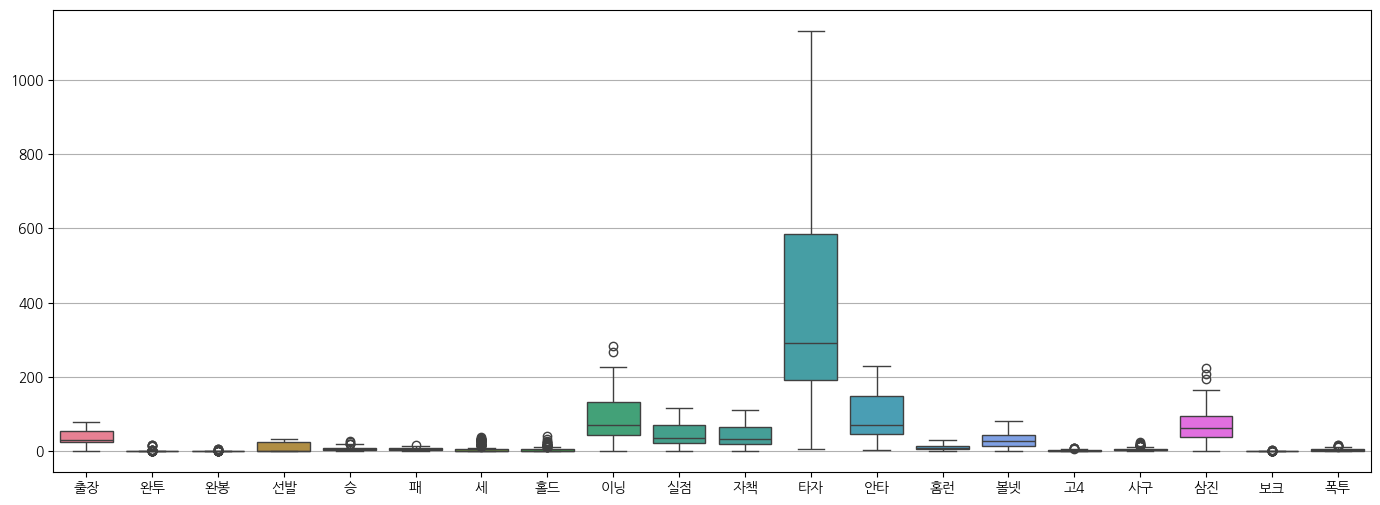

In [46]:
plt.figure(figsize=(17,6))
sns.boxplot(data=X1);
plt.grid(axis='y')
plt.show()

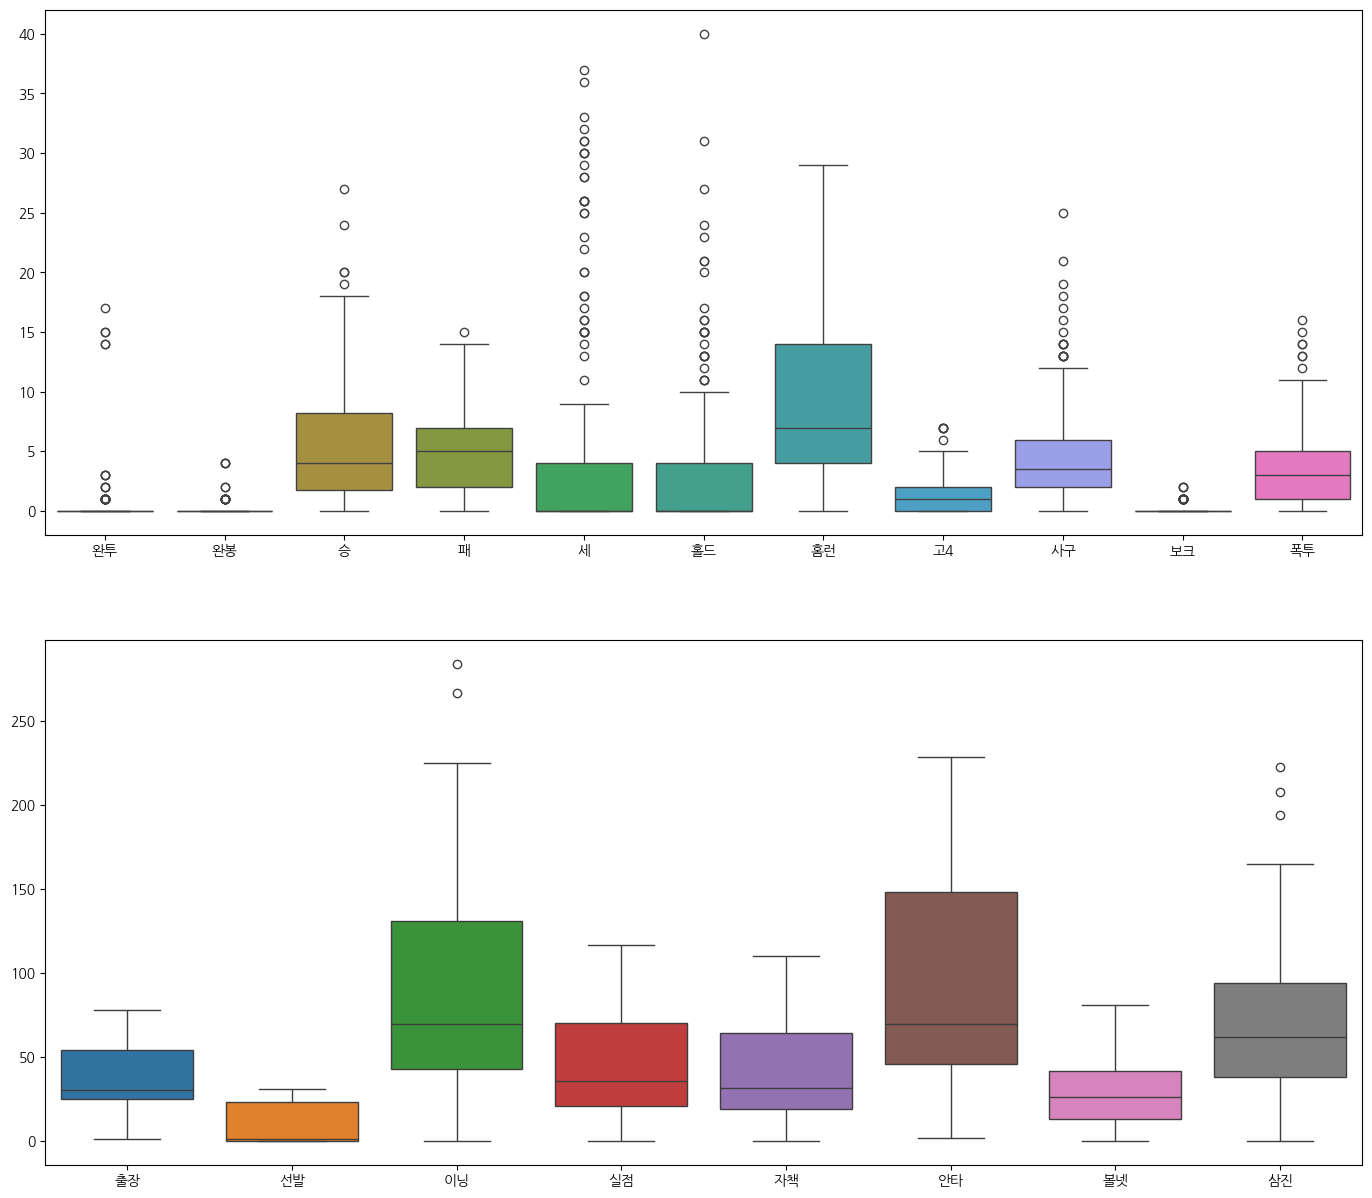

In [47]:
# 범위가 비슷한 수치인 것끼리 모아서 boxplot

tmp = X1.drop(columns='타자')

fig,ax = plt.subplots(2, 1, figsize=(17,15))
sns.boxplot(tmp[['완투','완봉','승','패','세','홀드','홈런','고4','사구','보크','폭투']], ax=ax[0])
sns.boxplot(tmp[['출장','선발','이닝','실점','자책','안타','볼넷','삼진']], ax=ax[1])
plt.show()

- － __After Scaling__

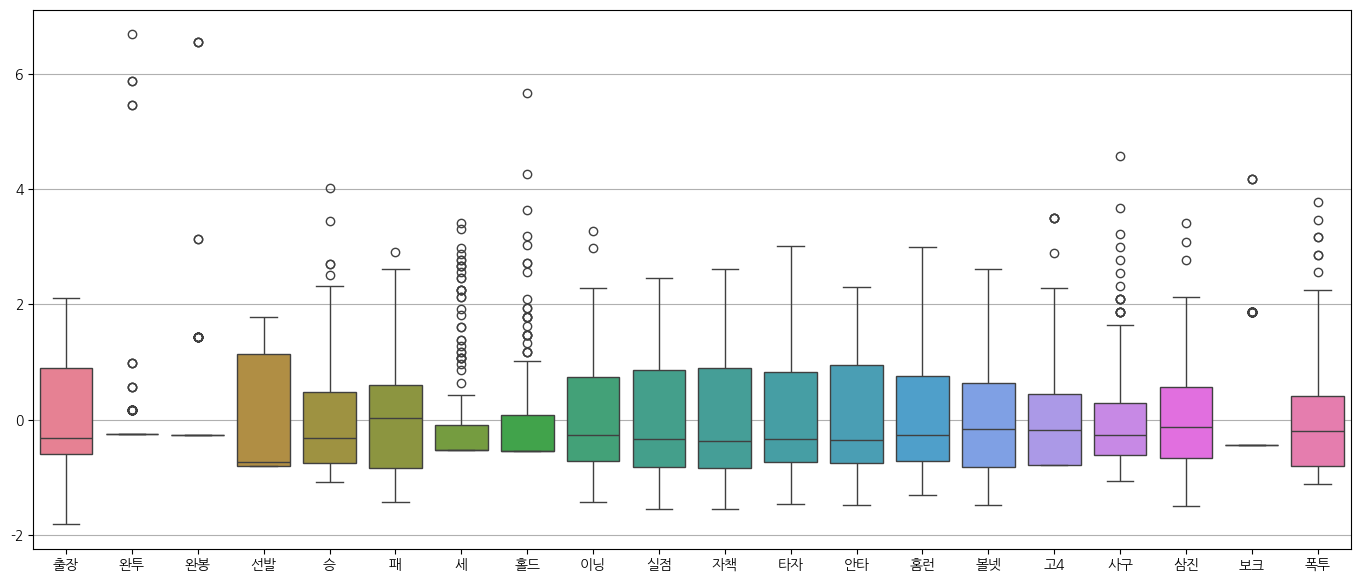

In [48]:
plt.figure(figsize=(17,7))
sns.boxplot(data=std_X1);
plt.grid(axis='y')
plt.show()

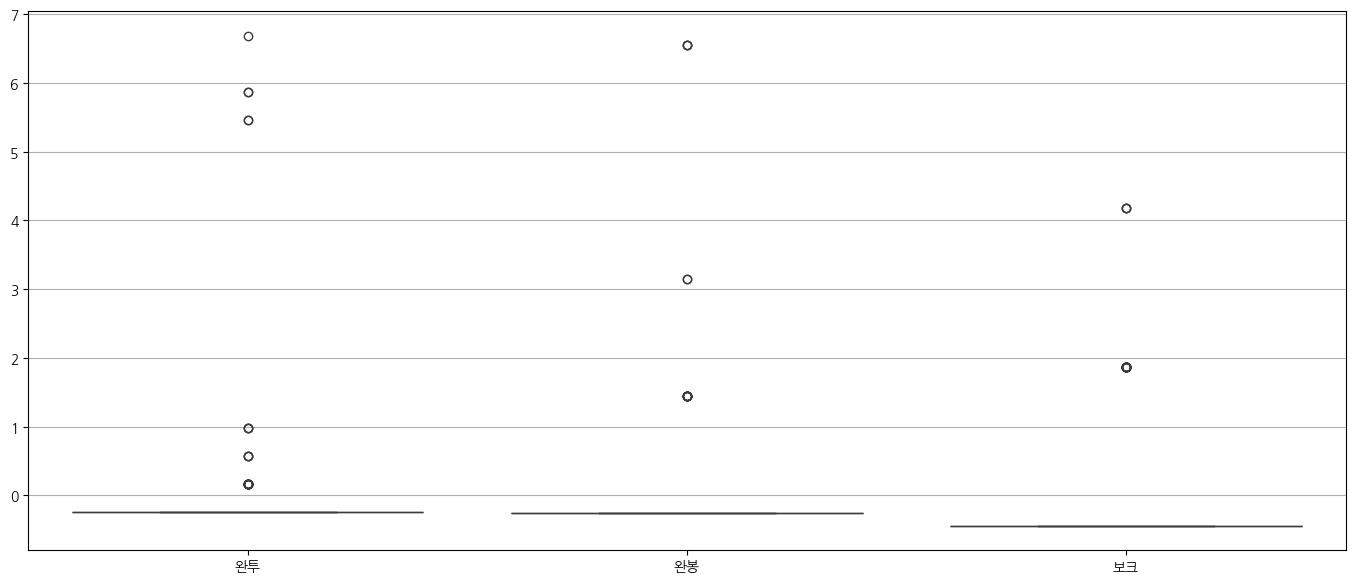

In [63]:
plt.figure(figsize=(17,7))
sns.boxplot(data=std_X1[['완투','완봉','보크']]);
plt.grid(axis='y')
plt.show()

</br>

#### __❕ Outlier__

In [58]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[column]
    quantile_25 = np.percentile(fraud.values, 25)
    quantile_75 = np.percentile(fraud.values, 75)
    
    iqr = quantile_75 - quantile_25
    iqr_weight = iqr * weight
    lowest_val = quantile_25 - iqr_weight
    highest_val = quantile_75 + iqr_weight
    
    outlier_index = fraud[(fraud < lowest_val) | (fraud > highest_val)].index.tolist()
    
    return outlier_index

In [67]:
columns = ['홀드', '사구']
outlier_index = []

for col in columns:
    outlier_index += get_outlier(std_X1, col, weight=2.5)

print(outlier_index, len(outlier_index))

tmp = set(outlier_index)
outlier_index = list(tmp)
print(outlier_index, len(outlier_index))

[14, 16, 22, 23, 29, 32, 49, 59, 81, 89, 119, 122, 123, 177, 180, 187, 76, 87, 115, 124, 126] 21
[14, 16, 22, 23, 29, 32, 49, 177, 180, 187, 59, 76, 81, 87, 89, 115, 119, 122, 123, 124, 126] 21


In [80]:
# Outlier 제거

copy_fig1 = std_features.drop(outlier_index, axis=0)
copy_fig1 = copy_fig1.drop(columns=['완투','완봉','보크'])
copy_fig1.shape

(167, 18)

</br>

#### __❕ Correlation__

In [123]:
corr_matrix1 = std_features.corr().round(1)
corr_matrix1

,출장,완투,완봉,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,보크,폭투,연봉
출장,1.0,-0.0,-0.0,-0.3,0.0,0.1,0.5,0.6,0.1,-0.0,-0.0,0.1,0.0,-0.0,0.1,0.5,0.0,0.2,0.1,0.1,0.1
완투,-0.0,1.0,0.9,0.2,0.6,0.3,-0.0,-0.1,0.5,0.2,0.2,0.5,0.4,0.1,0.3,0.1,0.2,0.5,0.1,-0.0,0.3
완봉,-0.0,0.9,1.0,0.3,0.5,0.3,-0.1,-0.1,0.5,0.2,0.2,0.5,0.4,0.1,0.3,0.1,0.2,0.5,0.0,-0.0,0.4
선발,-0.3,0.2,0.3,1.0,0.8,0.7,-0.4,-0.4,0.9,0.9,0.9,0.9,0.9,0.8,0.8,-0.3,0.6,0.8,0.1,0.4,0.4
승,0.0,0.6,0.5,0.8,1.0,0.6,-0.2,-0.2,0.9,0.7,0.7,0.9,0.8,0.6,0.8,-0.0,0.5,0.9,0.1,0.4,0.5
패,0.1,0.3,0.3,0.7,0.6,1.0,-0.1,-0.1,0.7,0.8,0.8,0.8,0.8,0.7,0.7,0.1,0.5,0.7,0.1,0.4,0.4
세,0.5,-0.0,-0.1,-0.4,-0.2,-0.1,1.0,-0.1,-0.2,-0.3,-0.3,-0.2,-0.2,-0.3,-0.2,0.4,-0.2,-0.1,0.1,-0.1,0.1
홀드,0.6,-0.1,-0.1,-0.4,-0.2,-0.1,-0.1,1.0,-0.2,-0.2,-0.2,-0.2,-0.2,-0.2,-0.1,0.2,-0.1,-0.1,0.0,-0.1,-0.1
이닝,0.1,0.5,0.5,0.9,0.9,0.7,-0.2,-0.2,1.0,0.9,0.8,1.0,1.0,0.7,0.9,-0.0,0.6,0.9,0.1,0.4,0.5
실점,-0.0,0.2,0.2,0.9,0.7,0.8,-0.3,-0.2,0.9,1.0,1.0,0.9,0.9,0.9,0.8,-0.1,0.6,0.8,0.1,0.5,0.3


- － __Corr Heatmap__

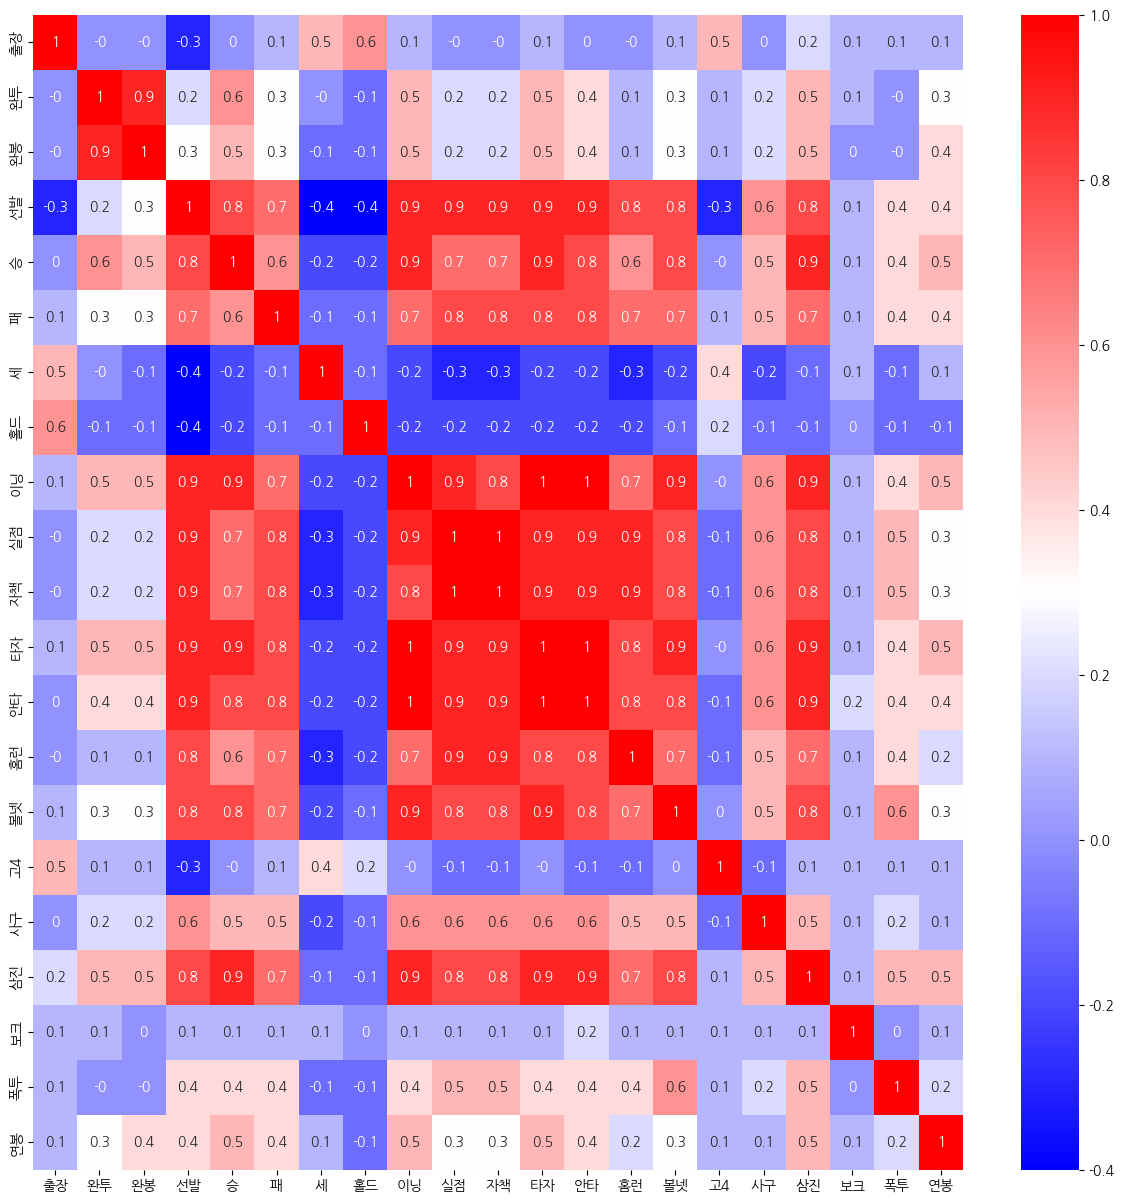

In [124]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_matrix1, annot=True, cmap='bwr');
plt.show()

👉 결과

- '완봉', '선발', '승', '패', '이닝', '타자', '안타', '삼진' features가 연봉과 상관관계가 있어 보인다.

- 가운데 붉에 상관관계가 거의 0.8 이상인 features 가 존재한다.

- 다중 공선성 분석이 필요해 보인다.<br></br>


👉 해석 : 다중 공선성

- 회귀 분석은 피처 간의 '독립성'을 전제로 하는 분석 방법이기 때문에 올바른 회귀 분석을 하려면 이러한 피처 쌍을 제거해야 한다.
- 그래서 다중 공선성이라는 것을 살펴봐야 한다.

- 다중 공선성이란 변수 간 상관 관계가 높아 분석에 부정적인 영향을 미치는 것을 의미한다.
- 다중 공선성을 살펴봄으로써 여러 피처간의 연관성을 고려했을 때 어떤 피처를 제거하는 것이 옳은 판단일지 

	혹은 제거하는 것 자체가 맞는 판단인지에 대한 기준을 제시해 줄 수 있다.
	
- 다중 공선성은 분산팽창요인(VIF)이라는 계수로 평가할 수 있다.<br></br>


> 다중 공선성(multicollinearity)은 회귀 분석에서 독립 변수 간에 높은 상관 관계가 있는 경우 발생합니다.</br>
> 이는 회귀 모델에서 독립 변수들 간의 선형 종속성이나 근접한 선형 종속성이 있음을 의미합니다.</br>
> 이러한 상황은 회귀 분석 결과를 해석하거나 모델을 예측하는 데 어려움을 초래할 수 있습니다.</br>
>
> 분산팽창요인(Variance Inflation Factor, VIF)은 다중 공선성을 측정하는 통계적 지표 중 하나입니다.</br>
> VIF는 각 독립 변수가 다른 독립 변수들과 상관 관계를 갖는 정도를 나타냅니다.</br>
> 일반적으로 VIF가 10 이상이면 다중 공선성이 높다고 판단되며, 5 이하면 다중 공선성이 낮다고 판단됩니다.</br>
> 더 나아가, VIF가 1에 가까울수록 다른 독립 변수들과의 상관 관계가 낮다는 것을 의미합니다.
>
> VIF는 다음과 같이 계산됩니다:
>
> $~~~~~~~~VIF_i = \cfrac{1}{~1 - {R_i}^2~}$
>
> 여기서 $R_i^2$는 독립 변수 $ i $를 다른 모든 독립 변수들의 선형 조합으로 선형 회귀한 결과의 결정 계수입니다.
>
> 따라서 VIF는 독립 변수 간의 상관 관계 정도를 측정하여 다중 공선성의 존재를 파악하는 데 사용됩니다.</br>
> 일반적으로 VIF가 높은 독립 변수는 모델에서 제거하여 모델의 안정성을 높이는데 도움이 됩니다.


</br>

◼ 회귀 분석 예측 성능을 높이기 위한 방법 : 다중 공선성 확인

#### __❕ Multicollinearlity__

- '보크', '고4', '폭투', '사구', '세', '홀드', '패', '완봉', '홈런' 정도 features가 독립성이 보장되어 보인다.

In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = std_X1.columns
vif['VIF_factor'] = [variance_inflation_factor(std_X1.values, i) for i in range(std_X1.shape[1])]
vif.round(1).sort_values(by='VIF_factor')

,Features,VIF_factor
18,보크,1.1
15,고4,1.8
19,폭투,1.9
16,사구,3.2
6,세,3.6
7,홀드,3.8
5,패,4.0
2,완봉,4.4
13,홈런,6.0
1,완투,9.4


</br>

#### __❕ Pairplot__

- － __VIF ＜ 10__

	- features의 독립성은 좋으나 target인 '연봉'과의 관계성이 너무 부족하다.

c:\Users\happy\miniconda3\envs\ds_study\lib\site-packages\seaborn\axisgrid.py:123: UserWarning:

The figure layout has changed to tight



<Figure size 1700x1700 with 0 Axes>

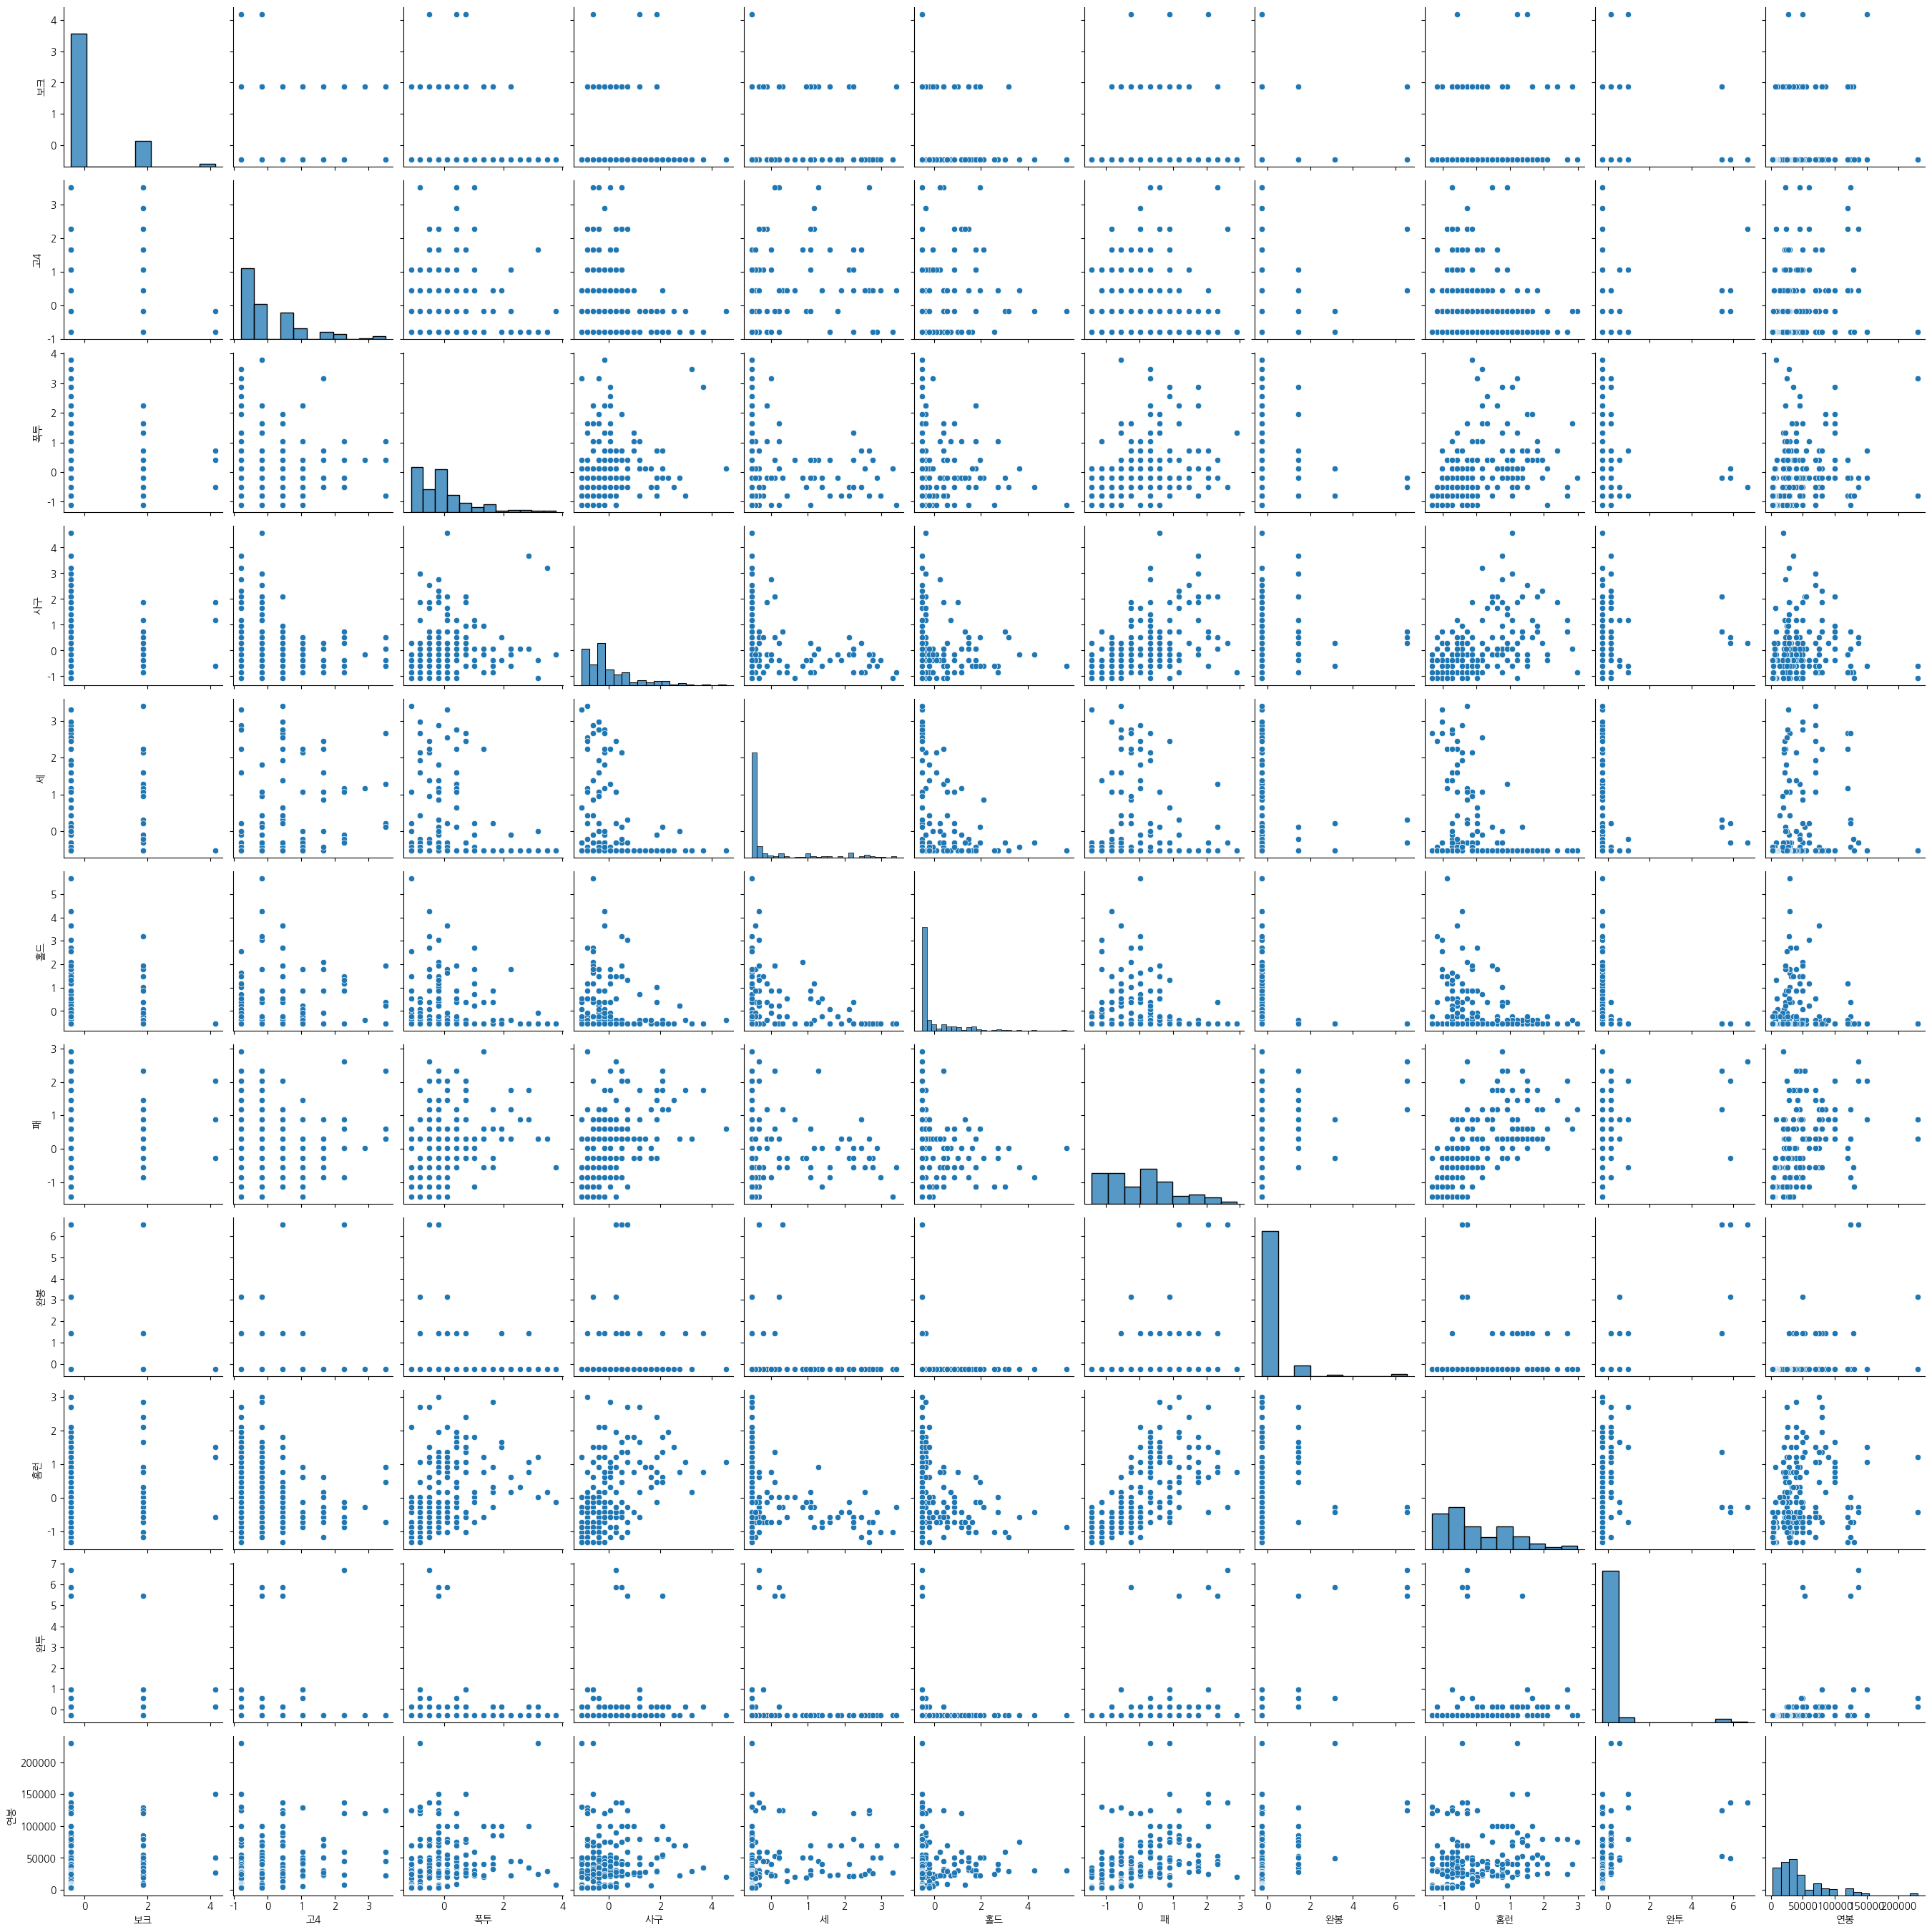

In [137]:
# VIF_factor < 10

columns = ['보크', '고4', '폭투', '사구', '세', '홀드', '패', '완봉', '홈런', '완투', '연봉']

plt.figure(figsize=(17,17))
sns.pairplot(std_features.loc[:, columns]);
plt.show()

- － __Corr > 0.4__

	- '이닝', '타자', '안타', '삼진'에서 feature 끼리의 강한 종속성이 보인다.

<Figure size 1700x1700 with 0 Axes>

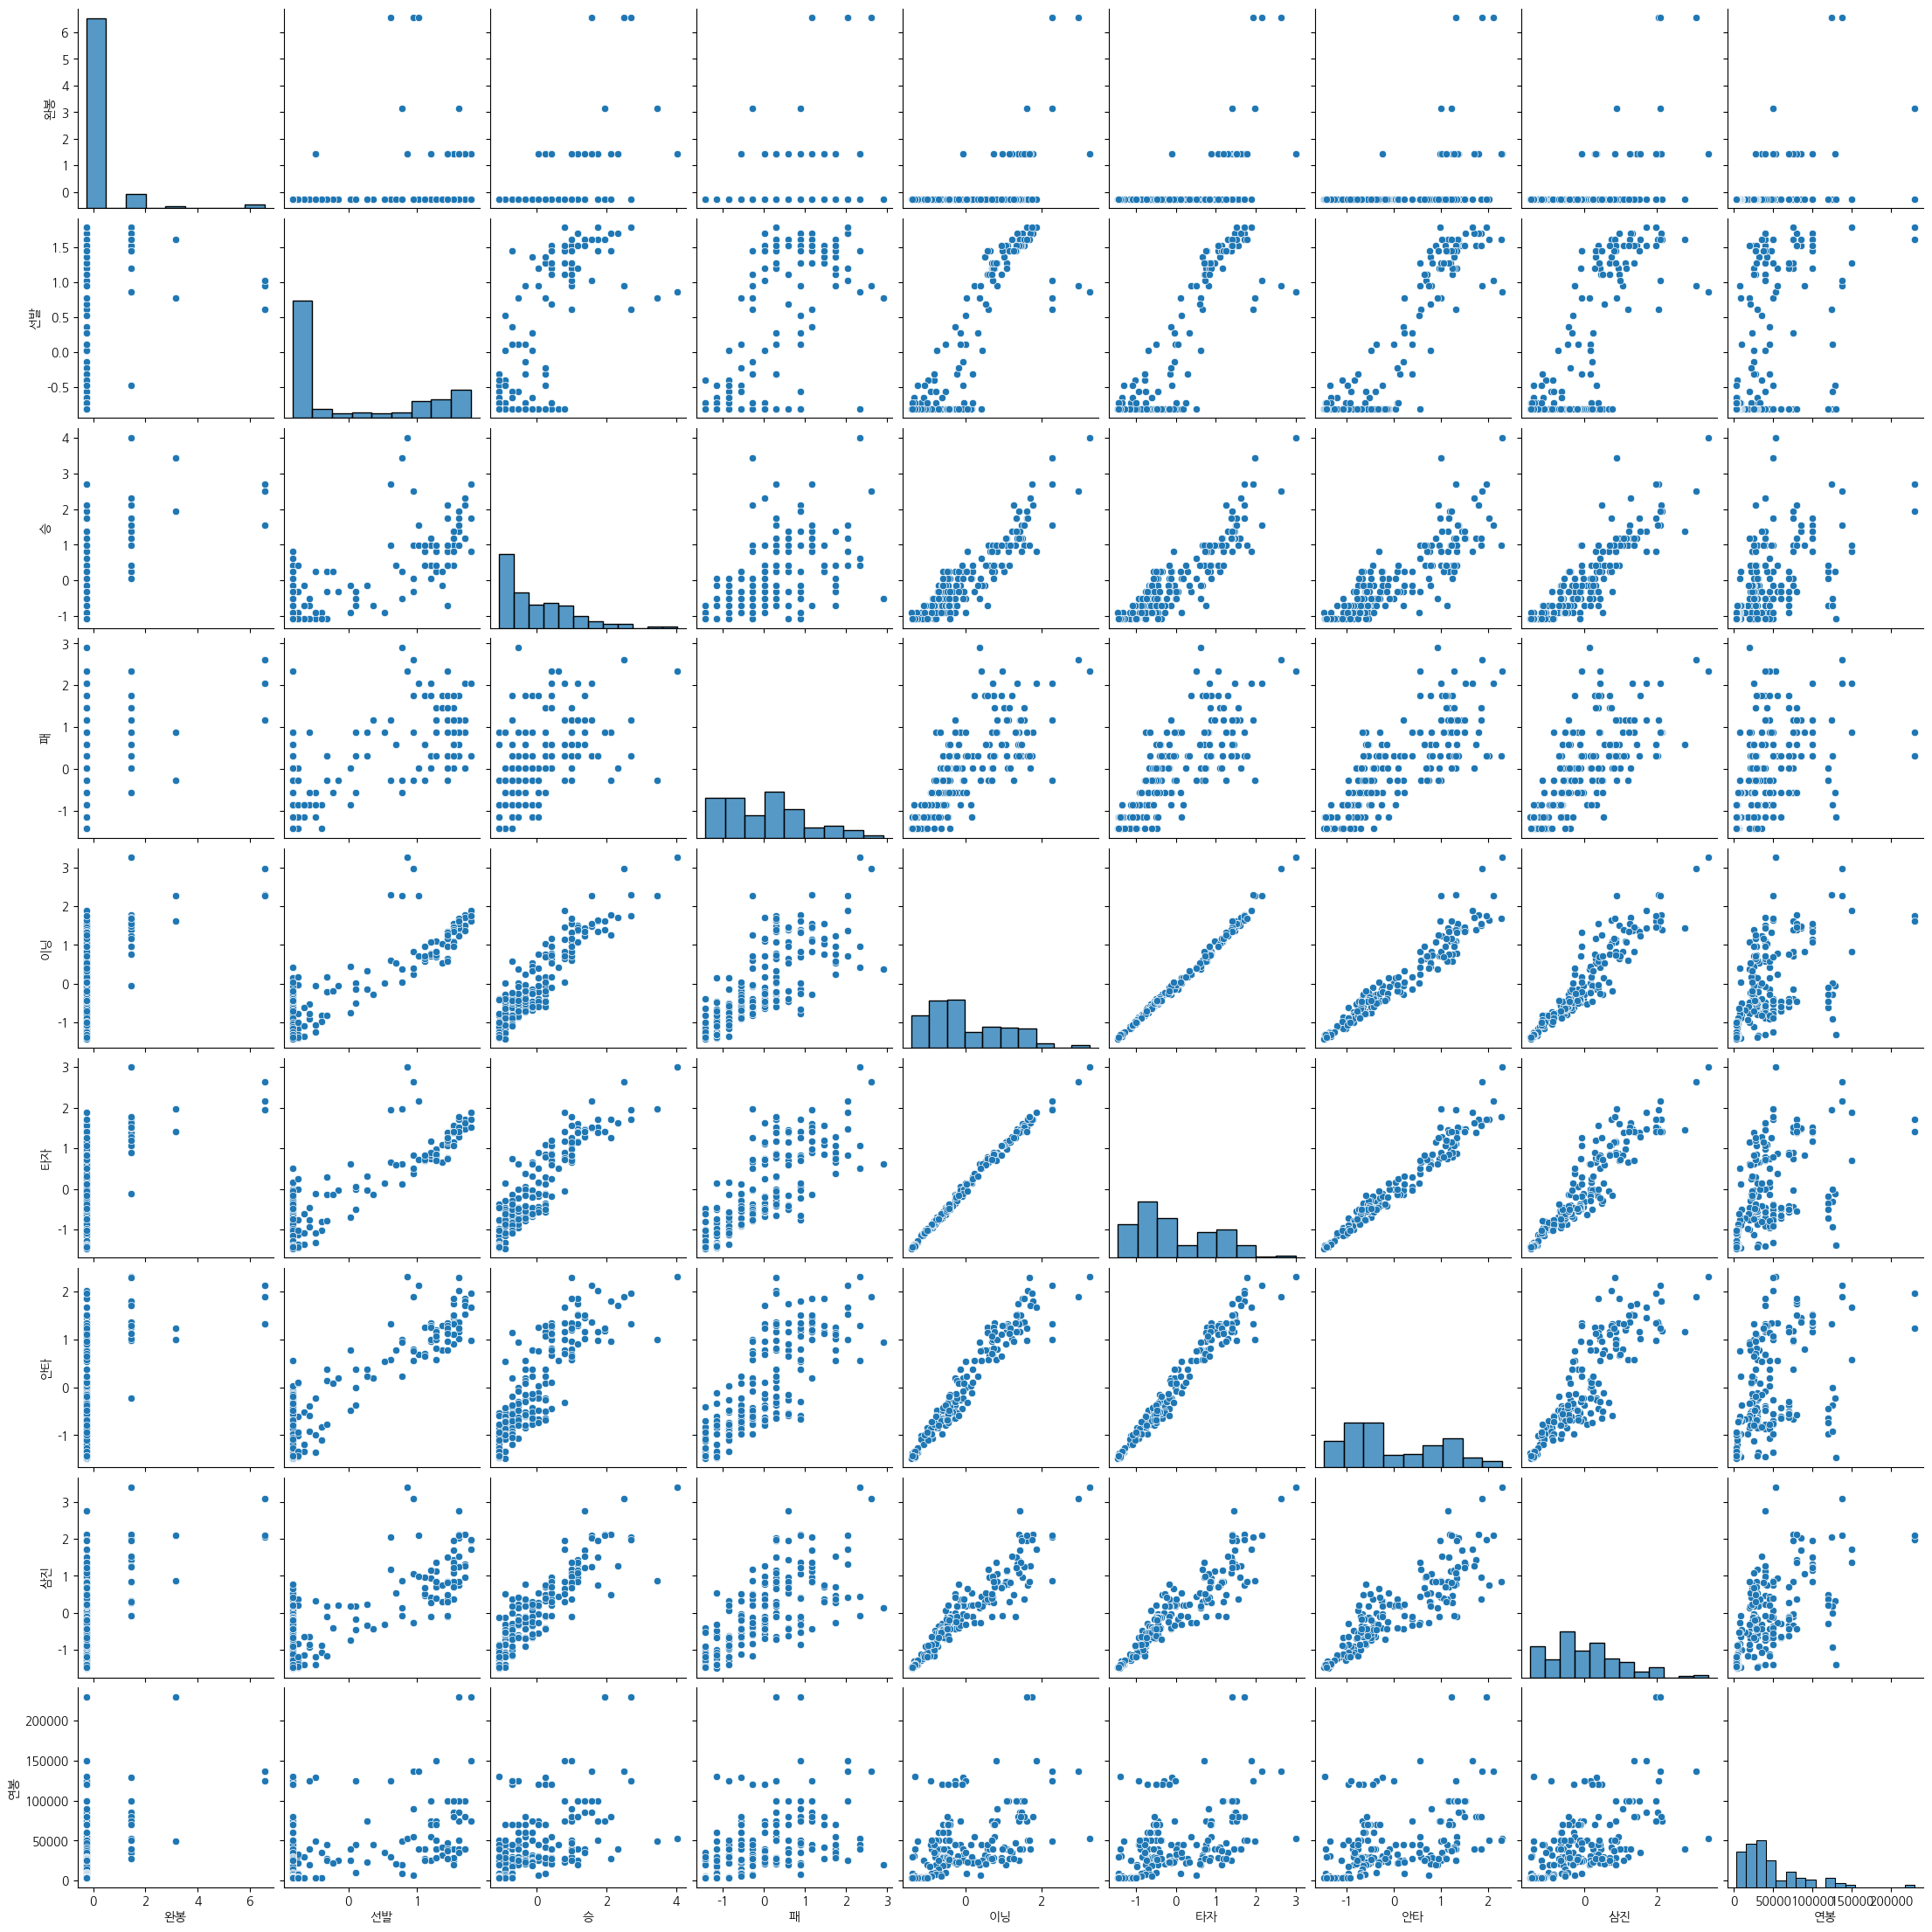

In [140]:
columns = ['완봉', '선발', '승', '패', '이닝', '타자', '안타', '삼진', '연봉']

plt.figure(figsize=(17,17))
sns.pairplot(std_features.loc[:, columns]);
plt.show()

</br>

#### __❕ Histogram__

- 예쁜 분포 모양을 가진 feature가 없어 보인다.

In [132]:
def plot_hist_each_column(df):
    plt.rcParams['figure.figsize'] = [17, 12]
    fig = plt.figure(1)
    
    # df의 column 갯수 만큼의 subplot을 출력한다.
    for i in range(len(df.columns)):
        ax = fig.add_subplot(4, 5, i+1)
        plt.hist(df[df.columns[i]], bins=50)
        ax.set_title(df.columns[i])
    plt.show()

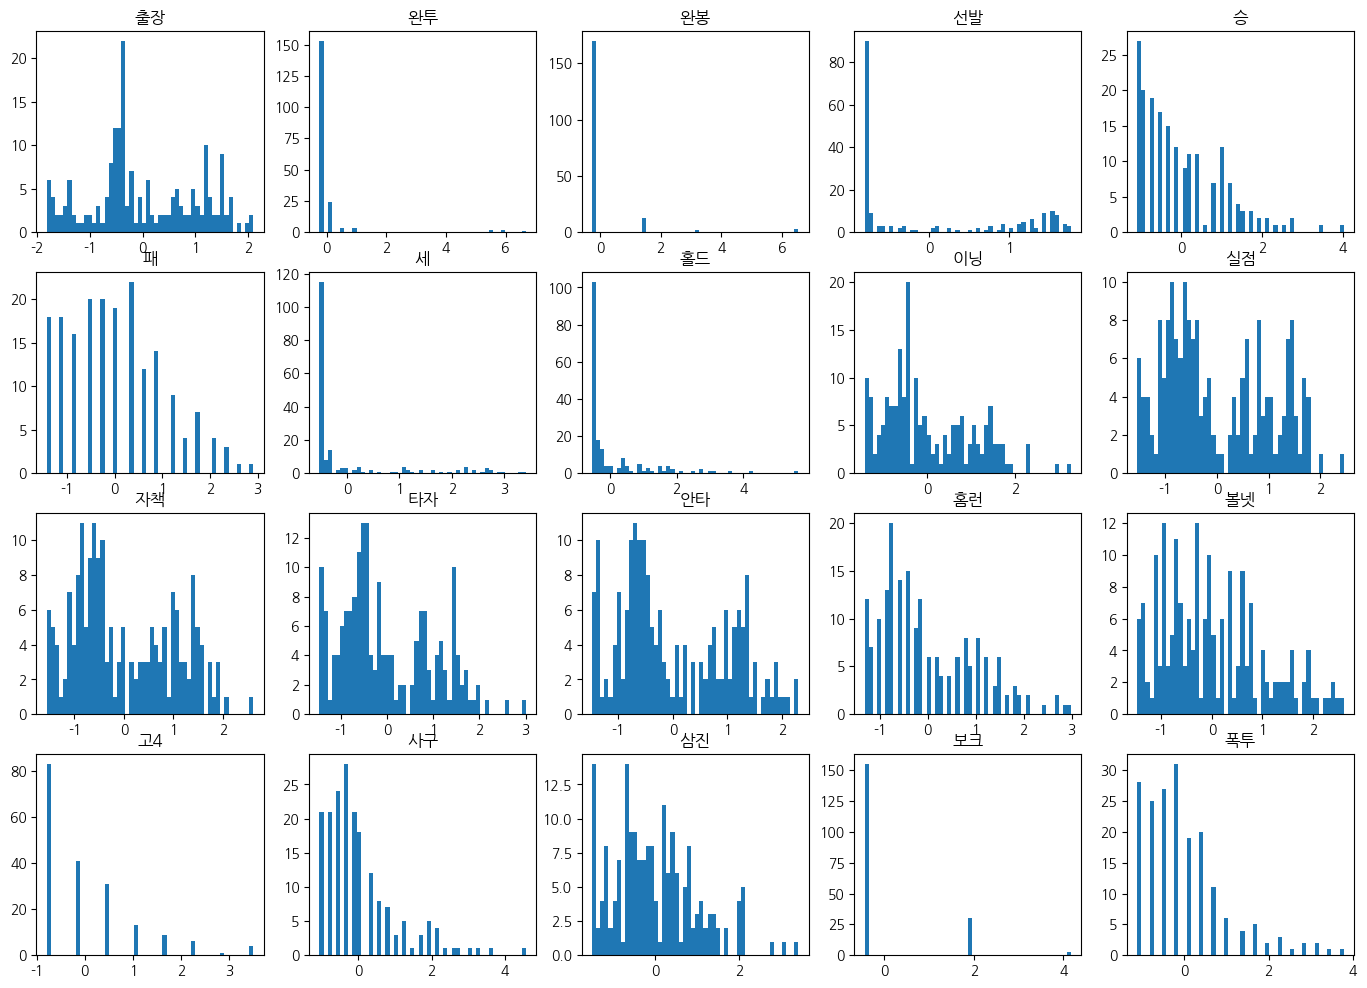

In [133]:
plot_hist_each_column(std_X1)

</br>

## ◾ Pitcher Features Group 2.

</br>

#### __❕ Describe__

In [69]:
features_g2 = pch_features_g2.iloc[:, 3:]
features_g2.describe()

,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
count,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000,188.000000
mean,44805.196809,1.779149,5.195851,4.861862,1.543511,114.913298,110.588830,7.354043,3.520426,2.463617,1.023032,18.368085,8.403191,1.208564,0.334372,69.510638,2.756915,0.457947
std,37458.121315,2.149832,3.655265,1.780095,0.542849,45.731502,31.701832,1.977626,2.030151,1.143801,0.840086,5.154339,3.290432,0.329572,0.073637,10.488022,2.102864,0.261653
min,3100.000000,-1.550000,0.000000,1.490000,0.630000,0.000000,32.700000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.430000,0.158000,11.100000,0.300000,0.000000
25%,22875.000000,0.197500,3.555000,4.030000,1.287500,89.575000,93.050000,6.090000,2.550000,1.735000,0.640000,15.175000,6.450000,0.997500,0.300500,65.175000,1.000000,0.271500
50%,34000.000000,1.200000,4.395000,4.700000,1.435000,110.650000,105.200000,7.185000,3.260000,2.245000,0.950000,18.200000,8.200000,1.175000,0.324000,70.800000,1.450000,0.500000
75%,60000.000000,2.802500,5.807500,5.410000,1.622500,134.700000,123.350000,8.535000,3.990000,2.972500,1.250000,21.300000,10.000000,1.360000,0.355250,76.000000,5.125000,0.667000
max,230000.000000,11.740000,30.860000,14.980000,4.500000,333.600000,248.700000,14.290000,16.200000,7.140000,7.710000,32.400000,25.000000,3.000000,1.000000,100.000000,7.000000,1.000000


- － __Split Label__

In [70]:
X2 = features_g2.iloc[:, 1:]
y2 = features_g2['연봉(만원)']

X2

,WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
0,9.54,1.84,2.82,0.97,211.2,137.8,4.33,2.68,1.61,0.28,12.4,7.7,0.78,0.213,76.6,6.2,0.860
1,0.26,3.48,2.44,1.36,94.0,133.9,3.48,3.48,1.00,0.00,9.3,9.3,0.77,0.286,71.4,2.6,0.000
2,9.72,2.40,2.25,1.04,135.4,144.6,7.05,2.15,3.28,0.57,19.7,6.0,1.02,0.267,77.0,5.6,0.680
3,9.88,1.92,1.82,0.94,177.6,187.7,6.44,1.64,3.93,0.28,18.6,4.7,0.90,0.257,76.0,5.4,0.690
4,11.74,1.55,1.49,0.97,191.8,200.0,7.01,1.85,3.78,0.24,20.0,5.3,0.99,0.268,80.3,6.9,0.580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,-0.36,5.25,4.60,1.72,78.6,89.5,5.40,3.45,1.57,0.90,12.8,8.2,0.98,0.361,69.7,1.0,0.250
184,3.03,3.64,3.99,1.28,112.9,103.4,4.96,3.36,1.48,0.28,13.0,8.8,0.92,0.273,70.3,5.6,0.810
185,0.41,4.05,3.20,1.32,104.0,132.1,8.85,2.55,3.47,0.60,23.0,6.6,1.27,0.339,66.8,1.0,0.500
186,2.89,3.88,4.83,1.13,109.8,89.6,6.19,2.06,3.00,1.44,16.9,5.6,0.92,0.251,77.0,5.5,0.611


</br>

#### __❕ Boxplot__

- 'ERA+', 'FIP+', 'LOB%' 를 제외할지 고민해볼 필요가 있어 보인다.

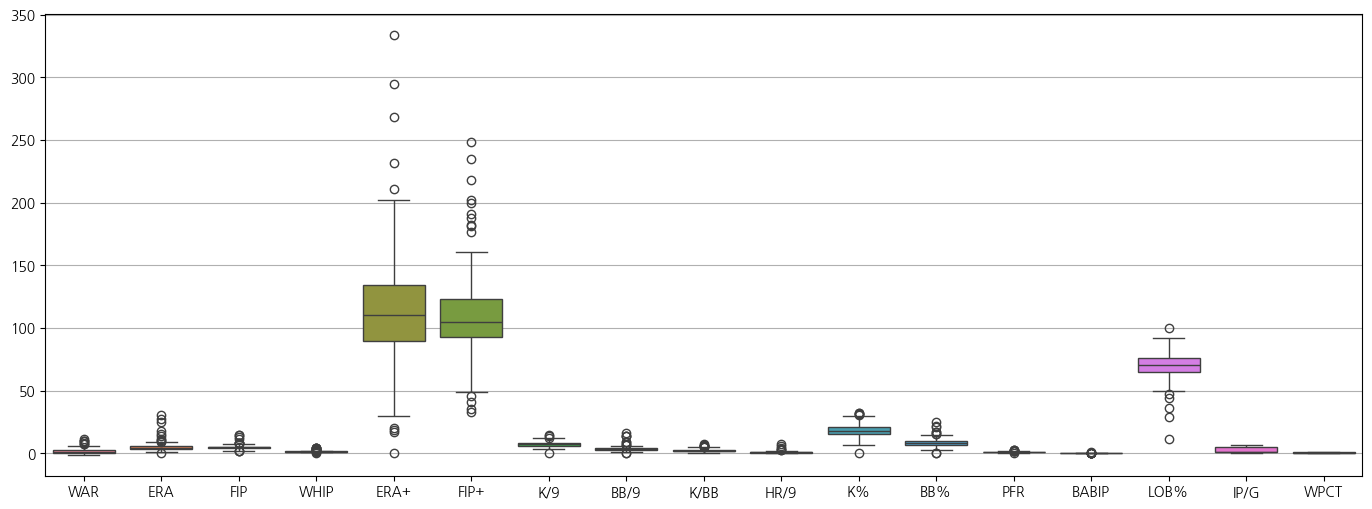

In [71]:
plt.figure(figsize=(17,6))
sns.boxplot(data=X2);
plt.grid(axis='y')
plt.show()

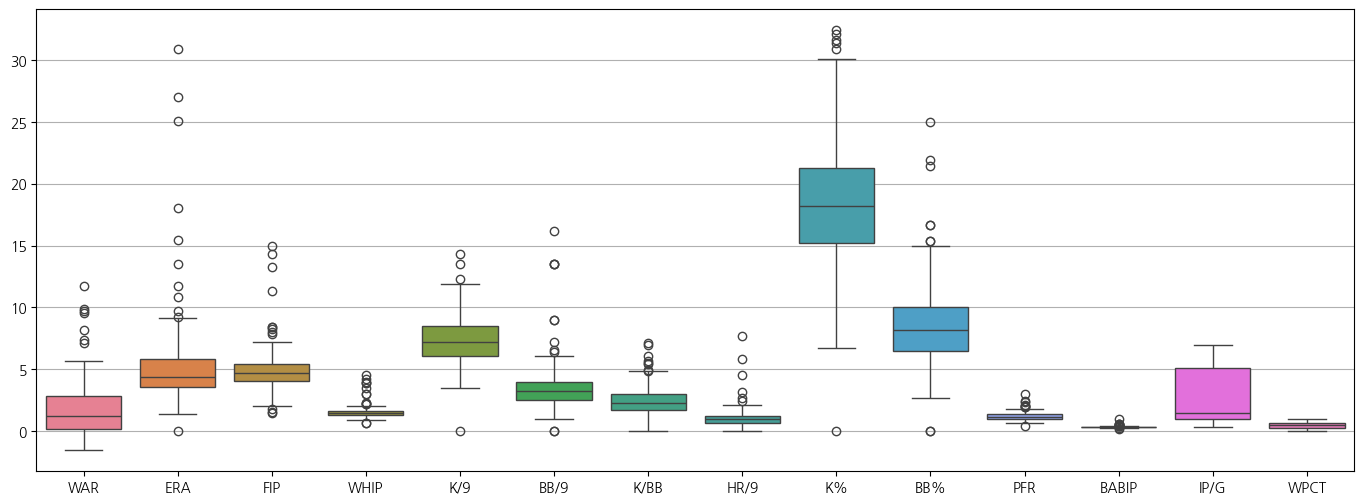

In [72]:
tmp = X2.drop(columns=['ERA+','FIP+','LOB%'])

plt.figure(figsize=(17,6))
sns.boxplot(data=tmp);
plt.grid(axis='y')
plt.show()

</br>

#### __❕ Correlation__

- 'WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'K/BB', 'IP/G' features >= |0.4|

In [163]:
corr_matrix2 = features_g2.corr().round(1)
corr_matrix2

,연봉(만원),WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
연봉(만원),1.0,0.6,-0.4,-0.4,-0.4,0.5,0.4,0.1,-0.3,0.4,-0.3,0.2,-0.3,-0.2,-0.3,0.3,0.4,0.2
WAR,0.6,1.0,-0.4,-0.5,-0.4,0.6,0.4,0.0,-0.3,0.3,-0.3,0.2,-0.3,-0.2,-0.4,0.5,0.6,0.4
ERA,-0.4,-0.4,1.0,0.7,0.9,-0.6,-0.5,-0.2,0.6,-0.4,0.5,-0.4,0.5,0.3,0.6,-0.7,-0.2,-0.3
FIP,-0.4,-0.5,0.7,1.0,0.8,-0.6,-0.8,-0.1,0.6,-0.5,0.7,-0.4,0.5,0.3,0.6,-0.3,-0.1,-0.2
WHIP,-0.4,-0.4,0.9,0.8,1.0,-0.6,-0.6,-0.1,0.8,-0.5,0.4,-0.4,0.6,0.5,0.8,-0.5,-0.2,-0.3
ERA+,0.5,0.6,-0.6,-0.6,-0.6,1.0,0.7,0.3,-0.4,0.5,-0.4,0.5,-0.3,-0.1,-0.4,0.6,0.1,0.3
FIP+,0.4,0.4,-0.5,-0.8,-0.6,0.7,1.0,0.4,-0.5,0.6,-0.6,0.6,-0.4,-0.1,-0.3,0.3,-0.0,0.1
K/9,0.1,0.0,-0.2,-0.1,-0.1,0.3,0.4,1.0,0.1,0.4,-0.0,0.9,0.1,0.7,0.2,0.2,-0.3,0.1
BB/9,-0.3,-0.3,0.6,0.6,0.8,-0.4,-0.5,0.1,1.0,-0.6,0.1,-0.2,0.9,0.7,0.6,-0.3,-0.2,-0.2
K/BB,0.4,0.3,-0.4,-0.5,-0.5,0.5,0.6,0.4,-0.6,1.0,-0.2,0.6,-0.7,-0.2,-0.3,0.3,0.0,0.2


- － __Corr Heatmap__

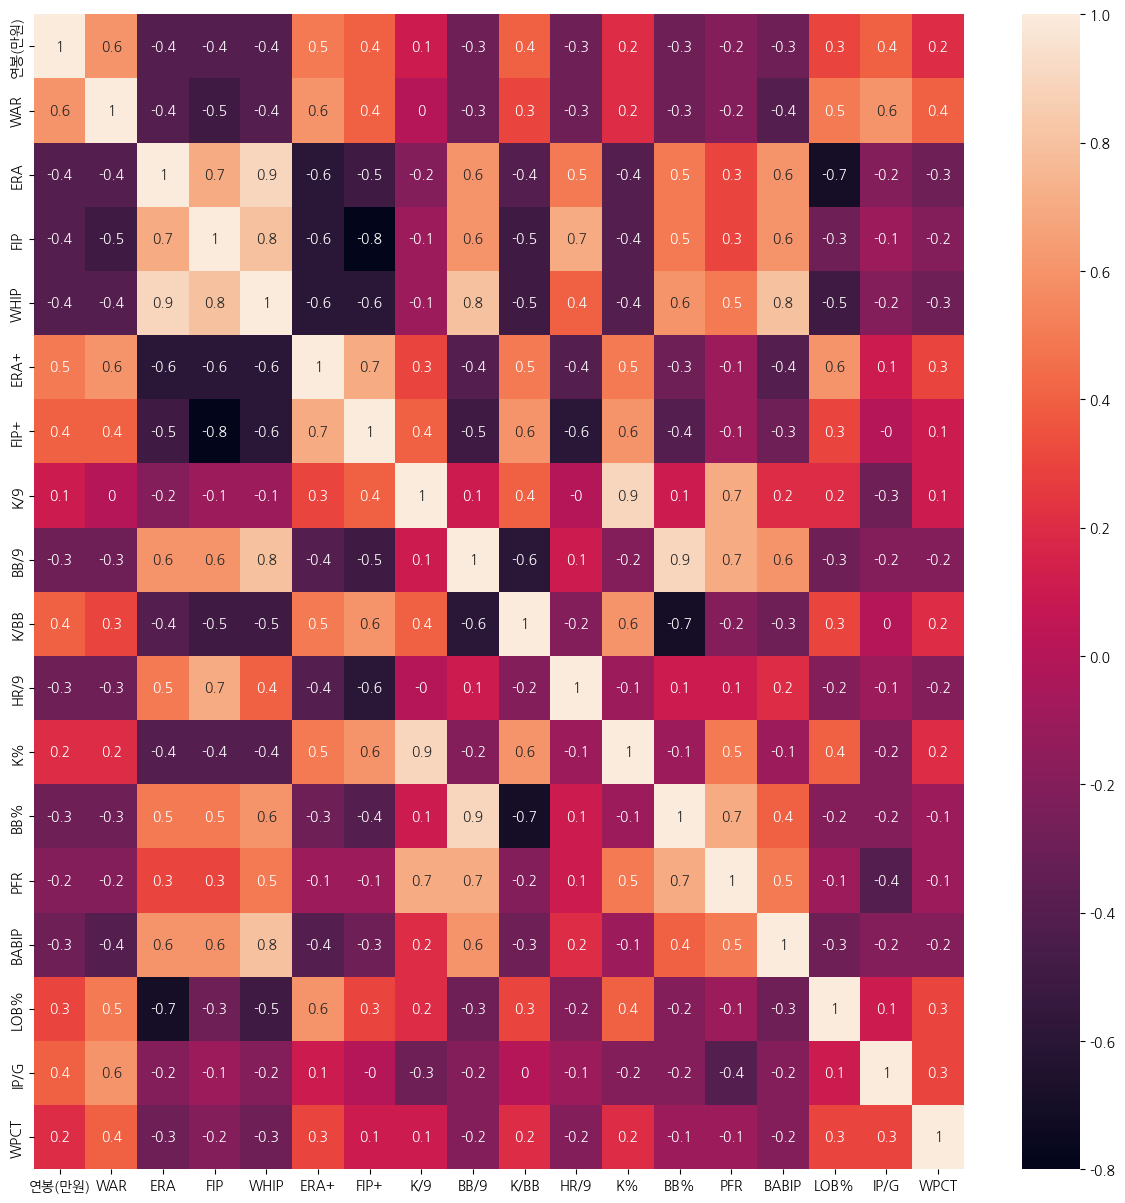

In [164]:
plt.figure(figsize=(15,15))
sns.heatmap(data=corr_matrix2, annot=True);
plt.show()

#### __❕ Multicollinearlity__

- features 간의 높은 상관 관계를 보이고 있다.

- 그나마 'IP/G', 'WAR', 'WPCT' 정도가 독립성을 가지고 있다.

In [166]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif['Features'] = X2.columns
vif['VIF_factor'] = [variance_inflation_factor(X2.values, i) for i in range(X2.shape[1])]
vif.round(1).sort_values(by='VIF_factor')

,Features,VIF_factor
15,IP/G,5.7
0,WAR,6.2
16,WPCT,6.3
4,ERA+,24.9
9,HR/9,26.1
8,K/BB,34.8
1,ERA,50.5
5,FIP+,59.7
2,FIP,154.1
14,LOB%,194.6


</br>

#### __❕ Pairplot__

- － __VIF ＜ 10__

	- 'IP/G', 'WAR' 에서 '연봉'과의 선형 관계가 살짝 보이고 있다.

<Figure size 1700x1700 with 0 Axes>

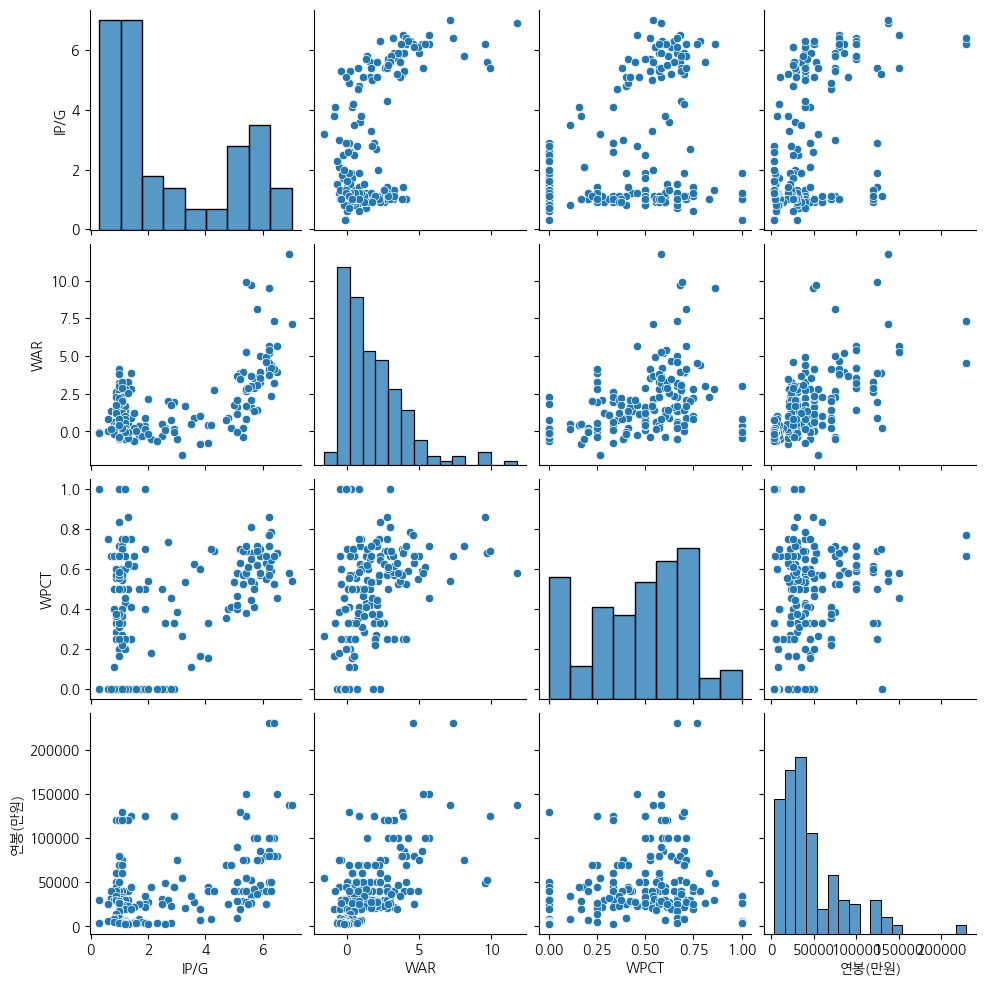

In [171]:
# VIF_factor < 10

columns = ['IP/G', 'WAR', 'WPCT', '연봉(만원)']

plt.figure(figsize=(17,17))
sns.pairplot(features_g2.loc[:, columns]);
plt.show()

- － __Corr > 0.4__

	- 'WAR', 'EAR+', 'K/BB' 에서 연봉과의 선형 관계가 조금 보이고 있다.

	- Outlier 값에 대한 처리 필요할지 고민해 볼 필요가 있어 보인다.

<Figure size 1700x1700 with 0 Axes>

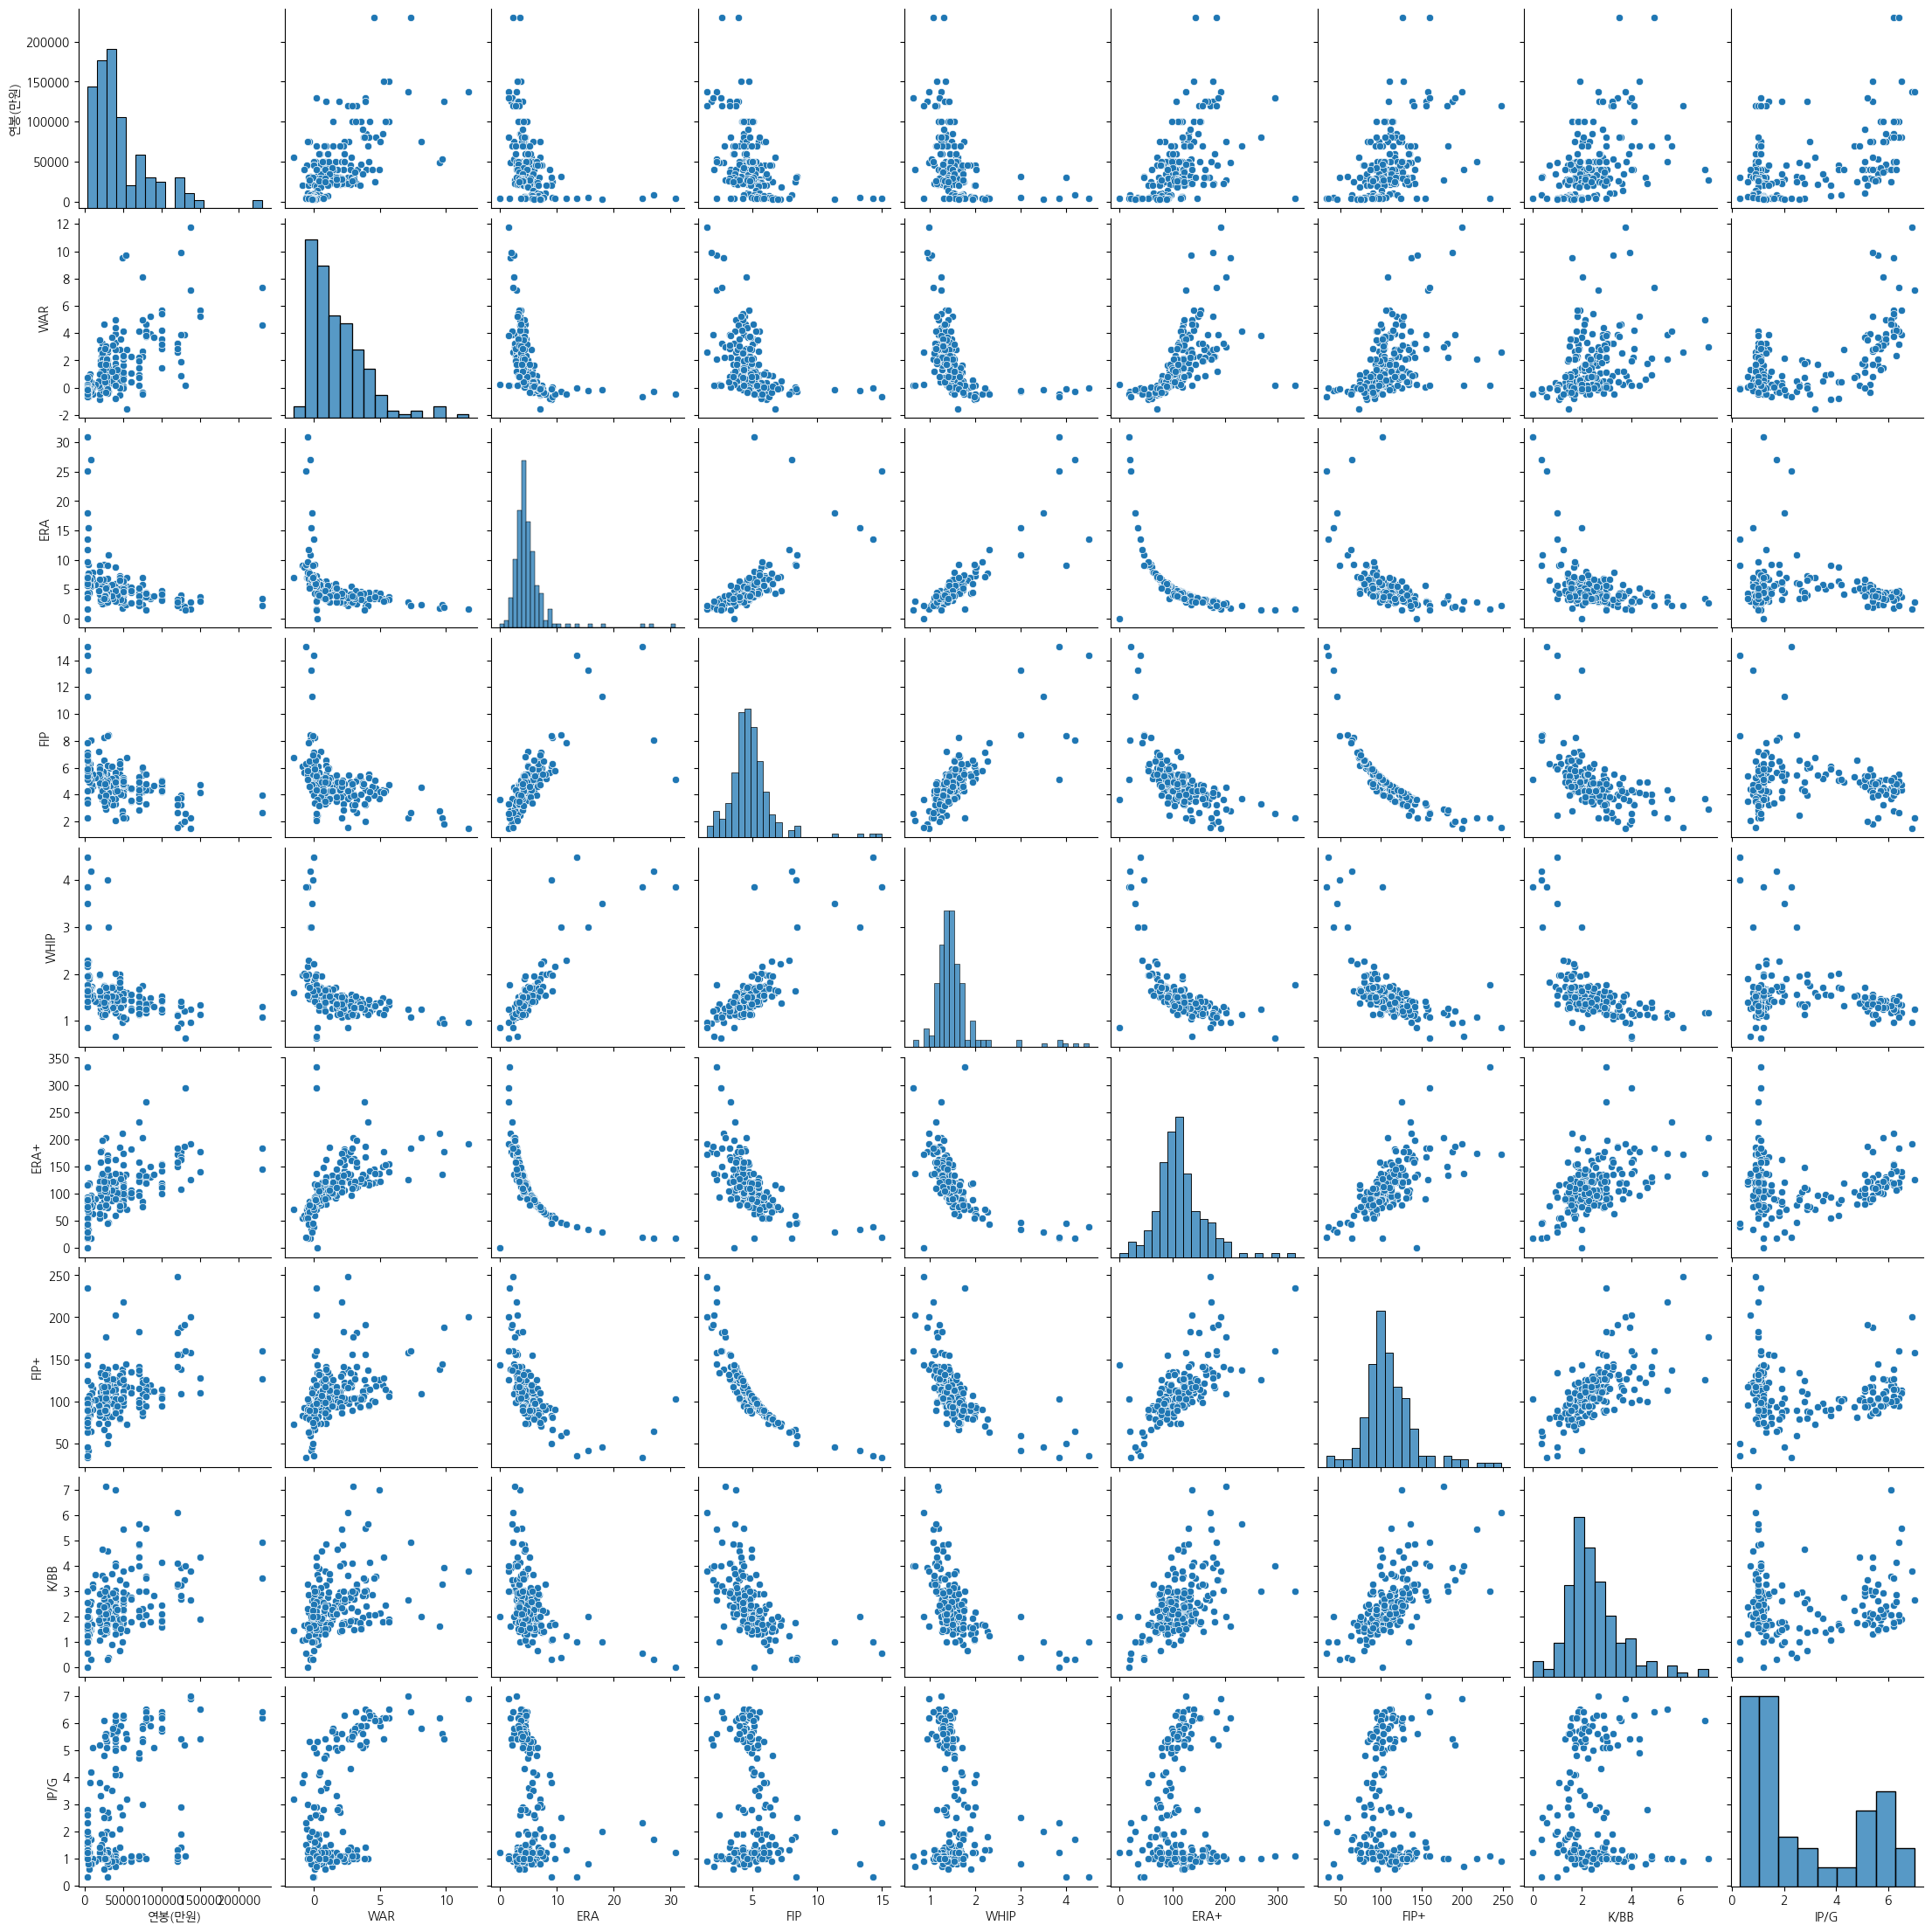

In [173]:
columns = [ '연봉(만원)', 'WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'K/BB', 'IP/G']

plt.figure(figsize=(17,17))
sns.pairplot(features_g2.loc[:, columns]);
plt.show()

</br>

#### __❕ Histogram__

- Pitcher Features Group 1에 비하면 features 가 좋은 분포를 가지고 있어 보인다.

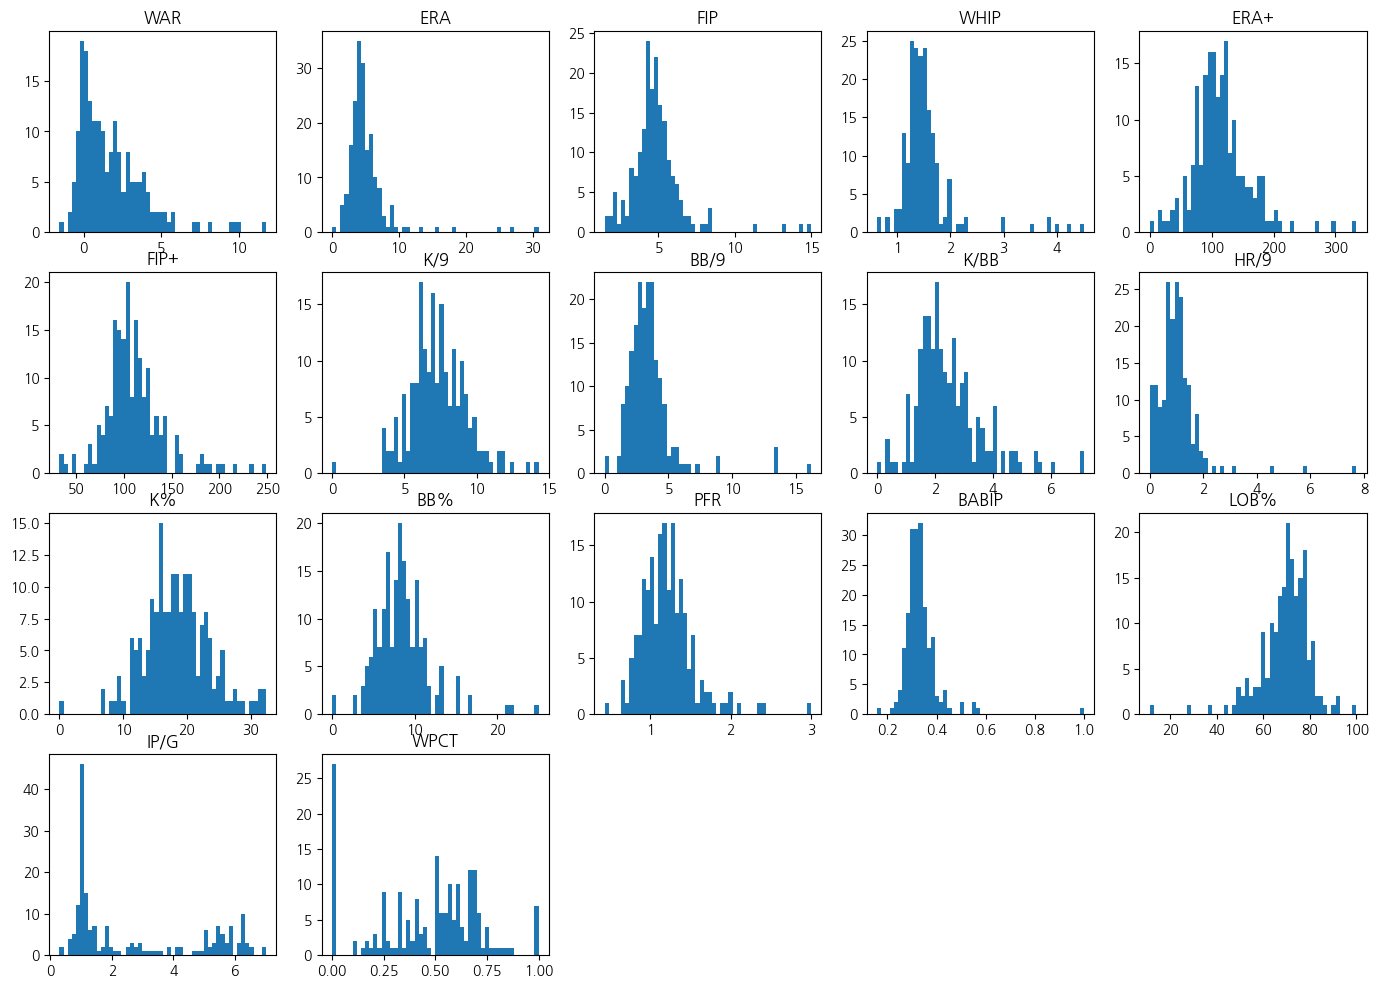

In [174]:
plot_hist_each_column(X2)

<br></br>

# 문제 3. Predict

> 이제 2번의 데이터를 기준으로 최동원의 성적이라면 연봉이 어떨지 예측하시오.
>
> 여기서 여러분들은 어쩌면 많은 고민을 해야하고, 다시 1번 문제로 돌아갈 수도 있습니다.

In [73]:
from sklearn.model_selection import train_test_split

def data_split(X, y, shape=False):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=17)
    if shape:
        print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)
    
    return (X_train, X_test, y_train, y_test)

In [74]:
import statsmodels.api as sm

def get_OLS_model(X, y, shape=False):
    # Data Split
    X_train, X_test, y_train, y_test = data_split(X, y, shape=shape)
    
    # Add Constant
    X_train_const = sm.add_constant(X_train)
    X_test_const = sm.add_constant(X_test)
    
    # Train Model
    lr_ols = sm.OLS(y_train, X_train_const).fit()
    
    return (lr_ols, X_test_const)

In [75]:
def compare_true_pred(y_test, pred):
	plt.figure(figsize=(7,7))
	sns.scatterplot(x=y_test, y=pred)
	plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'r', ls='--', lw=2);
	plt.ylabel('predict', fontsize=12)
	plt.show()

In [76]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def get_linearReg(X, y, print_R2=True):
    X_train, X_test, y_train, y_test = data_split(X, y)
    
    lreg = LinearRegression()
    lreg.fit(X_train, y_train)
    
    if print_R2:
        print("Train R2 score :", lreg.score(X_train, y_train)) # train R2 score 촐력
        print("Test R2 score :", lreg.score(X_test, y_test))   # test R2 score 출력
        
    return lreg

def print_RMSE(y_train, pred_train, y_test, pred_test):
    print("RMSE train:", np.sqrt(mean_squared_error(y_train, pred_train)))
    print("RMSE test:", np.sqrt(mean_squared_error(y_test, pred_test)))


</br>

## ◾ Pitcher Features Group 1.

In [81]:
copy_fig1

,출장,선발,승,패,세,홀드,이닝,실점,자책,타자,안타,홈런,볼넷,고4,사구,삼진,폭투,연봉
0,-0.036051,0.775453,3.446844,-0.268827,0.217515,-0.538263,2.277581,0.502765,0.187089,1.968588,1.000833,-0.273727,1.903334,-0.176279,0.288656,0.876996,0.112124,29086
1,-1.666765,-0.477714,-1.079396,-1.135219,-0.527926,-0.538263,-1.257701,-1.410176,-1.406497,-1.317895,-1.349250,-1.311841,-1.276675,-0.789993,-1.062399,-1.412021,-1.109864,29086
2,0.728346,0.858997,4.012624,2.330349,0.111023,-0.538263,3.268319,1.561714,1.325364,3.004544,2.300879,1.357594,1.953810,-0.176279,2.090064,3.408120,-0.193373,31241
3,0.269707,0.608364,2.692471,1.175159,0.324006,-0.538263,2.290791,0.502765,0.262974,1.944773,1.317511,-0.273727,0.590949,0.437434,0.739008,2.043514,-0.193373,73626
4,0.116828,0.942542,2.503877,2.619146,-0.314943,-0.538263,2.984308,0.502765,0.187089,2.635410,1.884198,-0.273727,1.297618,2.278575,0.288656,3.077973,-0.498870,80988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,-0.647569,1.109631,0.806537,-0.268827,-0.527926,-0.538263,0.708913,0.571084,0.528571,0.734172,0.700823,-0.422029,0.691902,-0.789993,0.964184,0.502830,0.723118,27500
183,1.339863,-0.811892,-0.702209,0.308767,-0.421434,0.856440,-0.433738,-0.248748,-0.230279,-0.373230,-0.182542,-0.422029,-0.317625,1.664862,-0.386871,-0.707708,-0.193373,27000
184,-0.392770,1.443809,2.126691,-0.268827,-0.527926,-0.538263,1.268680,0.844361,0.945939,1.258104,0.950831,-0.570331,1.600476,-0.176279,1.189360,0.480820,0.417621,27000
185,1.186984,-0.811892,-0.513616,-0.557625,2.773311,-0.538263,-0.433738,-0.487865,-0.533819,-0.472459,-0.482552,-0.718633,-0.620483,0.437434,-0.386871,-0.201483,0.417621,26000


In [112]:
X1 = copy_fig1.iloc[:, :-1]
y1 = copy_fig1['연봉']

In [113]:
# X_train, X_test, y_train, y_test = data_split(std_X1, y1, shape=True)
X_train, X_test, y_train, y_test = data_split(X1, y1, shape=True)

(133, 17) (133,) (34, 17) (34,)


</br>

#### __❕ OLS Summary__

In [114]:
#lr_ols, X_test_const = get_OLS_model(std_X1, y1)
lr_ols, X_test_const = get_OLS_model(X1, y1)
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     연봉   R-squared:                       0.467
Model:                            OLS   Adj. R-squared:                  0.388
Method:                 Least Squares   F-statistic:                     5.918
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.48e-09
Time:                        12:51:01   Log-Likelihood:                -1550.5
No. Observations:                 133   AIC:                             3137.
Df Residuals:                     115   BIC:                             3189.
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.763e+04   3045.088     15.641      0.000    4.16e+04    5.37e+04
출장         -7334.0782   9677.275     -0.758      0.450   -2.65e+04    1.18e+04
선발          3.367e+04   1.12e+04      3.002      0.003    1.15e+04    5.59e+04
승           1.993e+04   8462.640      2.355      0.020    3163.469    3.67e+04
패           7767.5219   5141.330      1.511      0.134   -2416.463     1.8e+04
세           1.634e+04   6887.084      2.372      0.019    2694.156       3e+04
홀드          2.378e+04   1.14e+04      2.086      0.039    1198.400    4.64e+04
이닝          3.638e+04   1.37e+05      0.265      0.792   -2.36e+05    3.09e+05
실점          5.745e+04   3.29e+04      1.744      0.084   -7801.680    1.23e+05
자책         -7.693e+04   3.06e+04     -2.511      0.013   -1.38e+05   -1.62e+04
타자         -1.236e+05   1.91e+05     -0.648      0.518   -5.01e+05    2.54e+05
안타          5.794e+04   4.41e+04      1.315      0.191   -2.93e+04    1.45e+05
홈런          3150.7412   6025.640      0.523      0.602   -8784.891    1.51e+04
볼넷          2524.6803   1.46e+04      0.173      0.863   -2.63e+04    3.14e+04
고4          3210.3430   3271.564      0.981      0.329   -3269.996    9690.682
사구         -1.122e+04   5369.063     -2.090      0.039   -2.19e+04    -585.995
삼진          1.968e+04   9869.171      1.994      0.049     130.078    3.92e+04
폭투            83.3103   3898.947      0.021      0.983   -7639.754    7806.374
==============================================================================
Omnibus:                       29.868   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               43.198
Skew:                           1.167   Prob(JB):                     4.16e-10
Kurtosis:                       4.533   Cond. No.                         298.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

👉 해석

- 위 실행 결과에선 결정계수(R-squared), 혹은 수정 결정계수(Adj.R-squared)라는 점수를 눈여겨 볼 필요가 있다. 
- 이 점수들은 회귀 분석이 얼마나 잘 되었는지 평가하는 지표이며, '회귀 분석으로 추정한 모델이 주어진 데이터를 얼마나 잘 설명하는가?' 에 대한 점수이다.
- 이 점수들이 1에 가까울 수록 데이터를 잘 설명하는 모델이라고 할 수 있다.<br></br>

- 다음으로 F 통계량(F-statistic)이라는 수치를 살펴본다.
- F 통계량은 회귀식의 유의성 검정에 사용되는 값으로 F 통계량에 대한 p-value인 Prob(F-statistic) 수치외 함께 살펴봐야 한다.
- 일반적으로 p-value가 0.05 이하면 'F 통계량이 유의한 의미를 가진다'라는 결론을 내려도 무방하다.
- 또한 P>|t| 라는 정보는 각 피처의 검정 통계량(t-statistic) 이 얼마나 유의미한지에 대한 p-value를 나타낸다.
- 위 분석에서 회귀 분석에서 유의미한 피처들이라는 결론을 내릴 수 있는 0.05 미만의 p-value를 가진 피처들은...

	'완투', '패', '실점', '자책', '사구', '삼진'을 유의미한 피처들이라고 결론을 내릴 수 있다.

- － __참 값 vs. 예측 값__

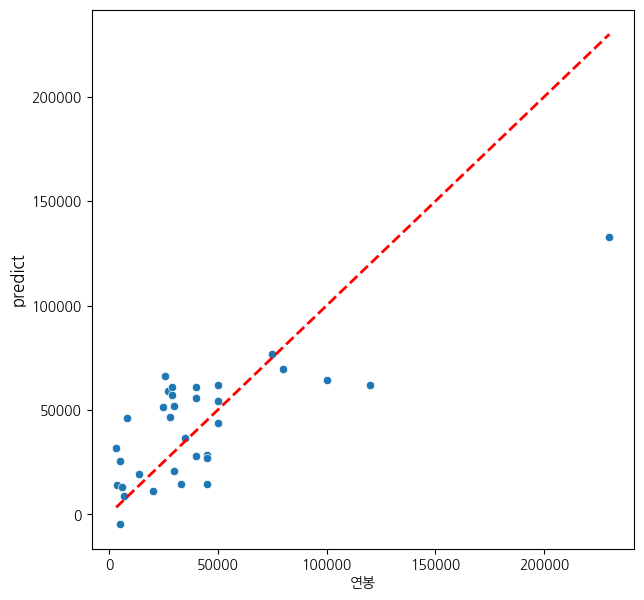

In [115]:
pred = lr_ols.predict(X_test_const)

compare_true_pred(y_test=y_test, pred=pred)

#### __❕ Feature Coefficients__

- 시각화한 결과 '이닝','실점','자책','타자', '안타', '삼진' feature 가 영향력이 커 보인다.

[Text(0, 0, 'const'),
 Text(1, 0, '출장'),
 Text(2, 0, '선발'),
 Text(3, 0, '승'),
 Text(4, 0, '패'),
 Text(5, 0, '세'),
 Text(6, 0, '홀드'),
 Text(7, 0, '이닝'),
 Text(8, 0, '실점'),
 Text(9, 0, '자책'),
 Text(10, 0, '타자'),
 Text(11, 0, '안타'),
 Text(12, 0, '홈런'),
 Text(13, 0, '볼넷'),
 Text(14, 0, '고4'),
 Text(15, 0, '사구'),
 Text(16, 0, '삼진'),
 Text(17, 0, '폭투')]

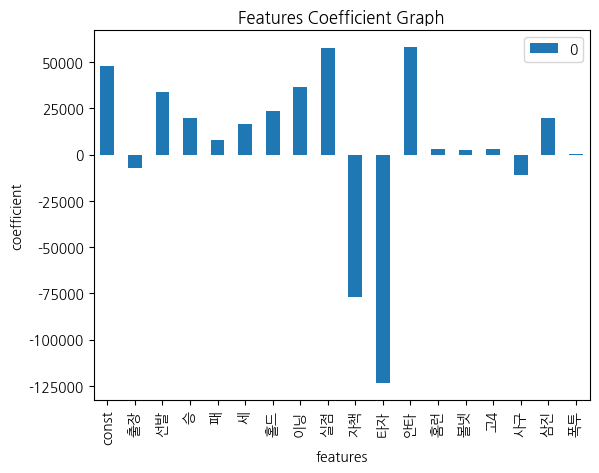

In [116]:
# 회귀 계수를 리스트로 반환한다.
coefs = lr_ols.params.to_frame()

# 변수명을 리스트로 반환한다.
x_labels = lr_ols.params.index.to_list()

# 회귀 계수를 출력한다.
ax = coefs.plot(kind='bar')
ax.set_title("Features Coefficient Graph")
ax.set_xlabel("features")
ax.set_ylabel("coefficient")
ax.set_xticklabels(x_labels)

</br>

#### __❕ Linear Reg. R2 score__

In [117]:
#lreg = get_linearReg(std_X1, y1, print_R2=True)
lreg = get_linearReg(X1, y1, print_R2=True)

Train R2 score : 0.46661086254068196
Test R2 score : 0.5637280970731744


👉 수치가 좋지는 않군...

- 실행 결과의 각 값은 학습 데이터셋과 테스트 데이터셋에 대한 평가 점수를 의미하며, 이 두 점수는 최대한 벌어지지 않는 것이 좋다. 
- 만약 학습 점수가 테스트 점수에 비해 높다면 과적합이 발생한 것이다.

- 회귀 모델을 평가할 때는 RMSE score라는 측정 지표를 활용할 수도 있다.
- 이 점수는 실제값과 예측값의 차이를 절대적인 수치로 나타낸 것이다.
- 이 값이 높으면 높을수록 예측이 부정확하다는 것을 의미한다.

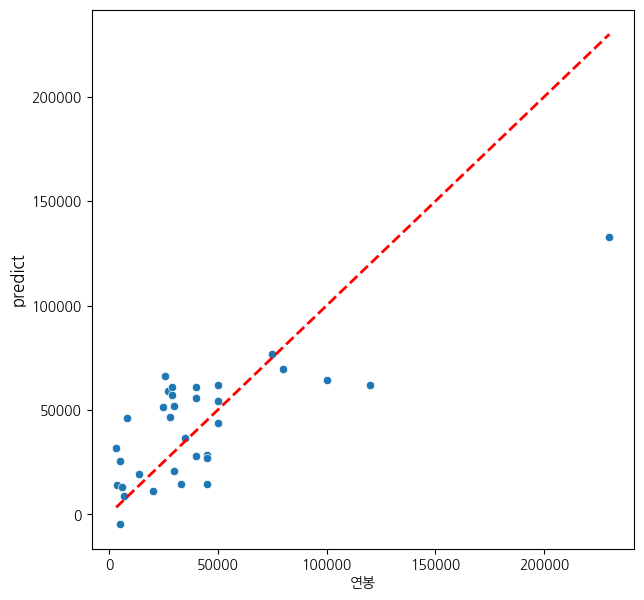

In [118]:
pred = lreg.predict(X_test)

compare_true_pred(y_test=y_test, pred=pred)

</br>

#### __❕ Linear Reg. RMSE__

In [119]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 27975.946257785916
RMSE test: 27740.055353083473


</br>

#### __❕ Feature Engineering__

1. 의미가 있고 영향력이 컸던 '완투', '패', '이닝','실점','자책','타자', '안타', '사구', '삼진' 특성으로 다시 모델링

In [92]:
columns = ['패', '이닝','실점','자책','타자', '안타', '사구', '삼진']
X = X1[columns]

X_train, X_test, y_train, y_test = data_split(X, y1, shape=True)

(133, 8) (133,) (34, 8) (34,)


In [93]:
ols_model, X_test_const = get_OLS_model(X, y1)
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     연봉   R-squared:                       0.370
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     9.122
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           8.33e-10
Time:                        12:48:09   Log-Likelihood:                -1561.5
No. Observations:                 133   AIC:                             3141.
Df Residuals:                     124   BIC:                             3167.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.483e+04   2778.550     16.133      0.000    3.93e+04    5.03e+04
패           5966.0022   4584.344      1.301      0.196   -3107.699     1.5e+04
이닝           925.4749   6.71e+04      0.014      0.989   -1.32e+05    1.34e+05
실점          1.503e+04   3.04e+04      0.494      0.622   -4.52e+04    7.52e+04
자책         -4.092e+04   2.78e+04     -1.473      0.143   -9.59e+04    1.41e+04
타자         -4.774e+04   8.25e+04     -0.578      0.564   -2.11e+05    1.16e+05
안타          6.061e+04   2.31e+04      2.627      0.010    1.49e+04    1.06e+05
사구         -9714.3621   4438.873     -2.188      0.031   -1.85e+04    -928.590
삼진          2.818e+04   9220.235      3.056      0.003    9927.387    4.64e+04
==============================================================================
Omnibus:                       33.372   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               53.172
Skew:                           1.220   Prob(JB):                     2.84e-12
Kurtosis:                       4.908   Cond. No.                         103.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'const'),
 Text(1, 0, '패'),
 Text(2, 0, '이닝'),
 Text(3, 0, '실점'),
 Text(4, 0, '자책'),
 Text(5, 0, '타자'),
 Text(6, 0, '안타'),
 Text(7, 0, '사구'),
 Text(8, 0, '삼진')]

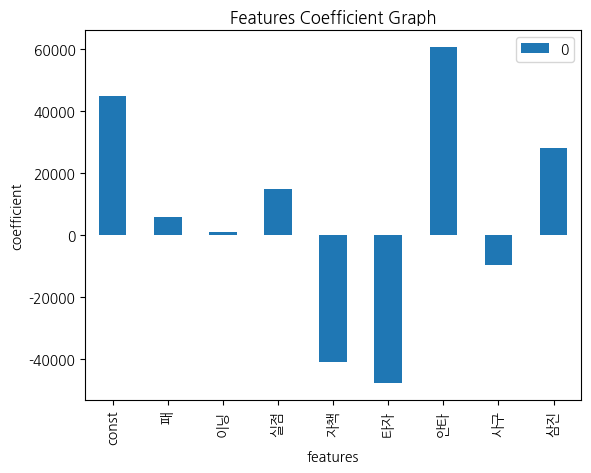

In [94]:
# 회귀 계수를 리스트로 반환한다.
coefs = ols_model.params.to_frame()

# 변수명을 리스트로 반환한다.
x_labels = ols_model.params.index.to_list()

# 회귀 계수를 출력한다.
ax = coefs.plot(kind='bar')
ax.set_title("Features Coefficient Graph")
ax.set_xlabel("features")
ax.set_ylabel("coefficient")
ax.set_xticklabels(x_labels)

In [95]:
lreg = get_linearReg(X, y1)

Train R2 score : 0.37048069661566285
Test R2 score : 0.5287632147606451


In [96]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 30392.556126209696
RMSE test: 28830.242377950457


👉 흠...

- R2 score에서 음수는 면했지만 의미없어 보인다.

- 오차도 2억이 넘어 가는 수준....

2. 다중 공선성(multicollinearity)이 큰 요소를 제거하고 다시 모델 학습

In [97]:
columns = ['고4', '폭투', '사구', '세', '홀드', '패', '홈런']
X = X1[columns]

X_train, X_test, y_train, y_test = data_split(X, y1, shape=True)

(133, 7) (133,) (34, 7) (34,)


In [98]:
ols_model, X_test_const = get_OLS_model(X, y1)
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     연봉   R-squared:                       0.200
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     4.465
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           0.000183
Time:                        12:48:46   Log-Likelihood:                -1577.5
No. Observations:                 133   AIC:                             3171.
Df Residuals:                     125   BIC:                             3194.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.515e+04   3371.459     13.391      0.000    3.85e+04    5.18e+04
고4          2583.6029   3630.126      0.712      0.478   -4600.866    9768.072
폭투          3955.1714   3768.258      1.050      0.296   -3502.680    1.14e+04
사구         -5607.0640   4628.210     -1.211      0.228   -1.48e+04    3552.738
세           4818.7030   3547.977      1.358      0.177   -2203.183    1.18e+04
홀드         -4425.1341   6306.343     -0.702      0.484   -1.69e+04    8055.902
패           1.037e+04   4561.749      2.274      0.025    1344.592    1.94e+04
홈런          6690.8521   4783.293      1.399      0.164   -2775.879    1.62e+04
==============================================================================
Omnibus:                       46.490   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              106.864
Skew:                           1.444   Prob(JB):                     6.23e-24
Kurtosis:                       6.307   Cond. No.                         3.48
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'const'),
 Text(1, 0, '고4'),
 Text(2, 0, '폭투'),
 Text(3, 0, '사구'),
 Text(4, 0, '세'),
 Text(5, 0, '홀드'),
 Text(6, 0, '패'),
 Text(7, 0, '홈런')]

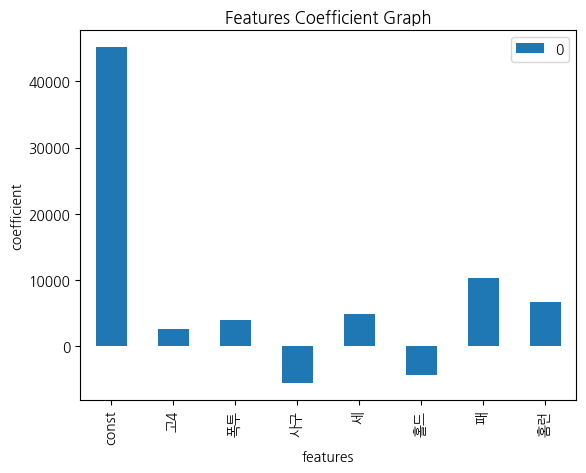

In [99]:
# 회귀 계수를 리스트로 반환한다.
coefs = ols_model.params.to_frame()

# 변수명을 리스트로 반환한다.
x_labels = ols_model.params.index.to_list()

# 회귀 계수를 출력한다.
ax = coefs.plot(kind='bar')
ax.set_title("Features Coefficient Graph")
ax.set_xlabel("features")
ax.set_ylabel("coefficient")
ax.set_xticklabels(x_labels)

In [100]:
lreg = get_linearReg(X, y1)

Train R2 score : 0.20004250201283524
Test R2 score : 0.1284683289220866


In [101]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 34260.69417667708
RMSE test: 39207.602649457855


3. 영향력 + 다중 공선성

In [102]:
columns = ['고4', '폭투', '이닝', '실점', '안타', '승', '타자', '삼진']
X = X1[columns]

X_train, X_test, y_train, y_test = data_split(X, y1, shape=True)

(133, 8) (133,) (34, 8) (34,)


In [103]:
ols_model, X_test_const = get_OLS_model(X, y1)
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     연봉   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.297
Method:                 Least Squares   F-statistic:                     7.987
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.22e-08
Time:                        12:49:17   Log-Likelihood:                -1564.7
No. Observations:                 133   AIC:                             3147.
Df Residuals:                     124   BIC:                             3173.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.575e+04   2825.664     16.193      0.000    4.02e+04    5.13e+04
고4          2462.1150   2792.704      0.882      0.380   -3065.429    7989.659
폭투          4247.7554   3883.580      1.094      0.276   -3438.937    1.19e+04
이닝          4.875e+04   7.27e+04      0.671      0.503   -9.51e+04    1.93e+05
실점         -1.913e+04   1.28e+04     -1.492      0.138   -4.45e+04    6249.712
안타          6.432e+04   2.36e+04      2.729      0.007    1.77e+04    1.11e+05
승           6060.4775   8041.643      0.754      0.452   -9856.186     2.2e+04
타자         -1.118e+05   8.63e+04     -1.296      0.198   -2.83e+05     5.9e+04
삼진          2.742e+04   9619.380      2.851      0.005    8384.517    4.65e+04
==============================================================================
Omnibus:                       39.041   Durbin-Watson:                   1.939
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.809
Skew:                           1.335   Prob(JB):                     4.21e-16
Kurtosis:                       5.377   Cond. No.                         101.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

[Text(0, 0, 'const'),
 Text(1, 0, '고4'),
 Text(2, 0, '폭투'),
 Text(3, 0, '이닝'),
 Text(4, 0, '실점'),
 Text(5, 0, '안타'),
 Text(6, 0, '승'),
 Text(7, 0, '타자'),
 Text(8, 0, '삼진')]

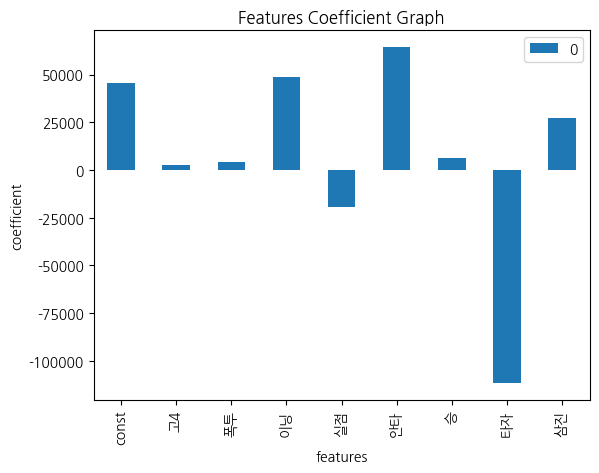

In [104]:
# 회귀 계수를 리스트로 반환한다.
coefs = ols_model.params.to_frame()

# 변수명을 리스트로 반환한다.
x_labels = ols_model.params.index.to_list()

# 회귀 계수를 출력한다.
ax = coefs.plot(kind='bar')
ax.set_title("Features Coefficient Graph")
ax.set_xlabel("features")
ax.set_ylabel("coefficient")
ax.set_xticklabels(x_labels)

In [105]:
lreg = get_linearReg(X, y1)

Train R2 score : 0.34006241259670666
Test R2 score : 0.4144138759758247


In [106]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 31118.176080087927
RMSE test: 32138.388018779984


In [147]:
report_df = pch_features_g1[['선수','연봉(만원)']]
report_df

,선수,연봉(만원)
0,박철순,29086
1,박철순,29086
2,최동원,31241
3,최동원,73626
4,최동원,80988
...,...,...
183,송은범,27000
184,이영하,27000
185,원종현,26000
186,문승원,25700


In [150]:
X1 = copy_fig1.iloc[:, :-1]
y1 = copy_fig1['연봉']
X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.2, random_state=17)

lreg = LinearRegression()
lreg.fit(X_train, y_train)

predict_salary = pd.Series(lreg.predict(X1)).round(1)
report_df['예측연봉'] = predict_salary
report_df.head(15)

,선수,연봉(만원),예측연봉
0,박철순,29086,60817.9
1,박철순,29086,32291.2
2,최동원,31241,79198.2
3,최동원,73626,83342.3
4,최동원,80988,104371.1
5,최동원,80988,74169.7
6,최동원,76262,59786.7
7,윤석민,125000,53830.0
8,정우람,120000,50098.0
9,장원준,100000,64533.2


👉 결론

- 최동원 선수의 연봉 예측은 6억에서 10억 사이 값이 나왔다.

- TOP10 선수 연봉까지는 아니지만 1군 연봉에는 속하는 것 같다.


</br>

## ◾ Pitcher Features Group 2.

In [121]:
X = X2.drop(columns=['ERA+','FIP+'])
X_train, X_test, y_train, y_test = data_split(X, y2, shape=True)

(150, 15) (150,) (38, 15) (38,)


In [122]:
std_X2 = X2.copy()

standard_scaling(std_X2)

,WAR,ERA,FIP,WHIP,ERA+,FIP+,K/9,BB/9,K/BB,HR/9,K%,BB%,PFR,BABIP,LOB%,IP/G,WPCT
0,3.609981,-0.918087,-1.147052,-1.056483,2.105479,0.858347,-1.529128,-0.413972,-0.746299,-0.884471,-1.157876,-0.213708,-1.300365,-1.648262,0.675948,1.637331,1.536591
1,-0.706636,-0.469419,-1.360524,-0.338051,-0.457306,0.735326,-1.958936,-0.019913,-1.279609,-1.217770,-1.759311,0.272550,-1.330707,-0.656907,0.180145,-0.074620,-1.750208
2,3.693708,-0.764883,-1.467259,-0.927534,0.447978,1.072846,-0.153741,-0.675036,0.713746,-0.539268,0.258407,-0.730357,-0.572148,-0.914931,0.714087,1.352006,0.848656
3,3.768132,-0.896201,-1.708820,-1.111747,1.370755,2.432388,-0.462192,-0.926249,1.282027,-0.884471,0.044994,-1.125442,-0.936256,-1.050733,0.618740,1.256898,0.886875
4,4.633316,-0.997424,-1.894203,-1.056483,1.681263,2.820379,-0.173967,-0.822809,1.150885,-0.932085,0.316610,-0.943096,-0.663175,-0.901350,1.028732,1.970211,0.466470
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,-0.995031,0.014814,-0.147105,0.325117,-0.794054,-0.665224,-0.988075,-0.034690,-0.781270,-0.146451,-1.080271,-0.061752,-0.693517,0.361609,0.018055,-0.835487,-0.794743
184,0.581837,-0.425647,-0.489784,-0.485422,-0.044024,-0.226764,-1.210564,-0.079021,-0.859955,-0.884471,-1.041469,0.120595,-0.875571,-0.833449,0.075263,1.352006,1.345498
185,-0.636863,-0.313480,-0.933580,-0.411736,-0.238639,0.678547,0.756441,-0.478007,0.879859,-0.503558,0.898644,-0.548011,0.186412,0.062845,-0.258451,-0.835487,0.160721
186,0.516715,-0.359988,-0.017899,-0.761742,-0.111811,-0.662070,-0.588606,-0.719368,0.468948,0.496339,-0.284825,-0.851922,-0.875571,-1.132214,0.714087,1.304452,0.584948


</br>

#### __❕ OLS Summary__

In [123]:
lr_ols, X_test_const = get_OLS_model(X, y2)
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 연봉(만원)   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.410
Method:                 Least Squares   F-statistic:                     7.910
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.63e-12
Time:                        12:54:35   Log-Likelihood:                -1749.2
No. Observations:                 150   AIC:                             3530.
Df Residuals:                     134   BIC:                             3579.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5985.0227   4.99e+04     -0.120      0.905   -1.05e+05    9.27e+04
WAR         5562.2596   2077.388      2.678      0.008    1453.548    9670.971
ERA        -5255.6394   2604.014     -2.018      0.046   -1.04e+04    -105.353
FIP         1.193e+04   5690.245      2.097      0.038     679.216    2.32e+04
WHIP        1.565e+04   3.54e+04      0.442      0.659   -5.44e+04    8.57e+04
K/9        -8936.7000   9.51e+04     -0.094      0.925   -1.97e+05    1.79e+05
BB/9        2.305e+04   9.59e+04      0.240      0.810   -1.67e+05    2.13e+05
K/BB        7048.7335   6122.258      1.151      0.252   -5060.026    1.92e+04
HR/9       -1.204e+04   9477.303     -1.271      0.206   -3.08e+04    6702.738
K%           1.35e+04   4301.807      3.138      0.002    4992.160     2.2e+04
BB%         -976.8411   5660.290     -0.173      0.863   -1.22e+04    1.02e+04
PFR        -1.884e+05   8.51e+05     -0.221      0.825   -1.87e+06    1.49e+06
BABIP       1.047e+05   1.59e+05      0.657      0.512   -2.11e+05     4.2e+05
LOB%       -1263.1460    499.967     -2.526      0.013   -2251.994    -274.298
IP/G        5202.5604   1759.953      2.956      0.004    1721.681    8683.440
WPCT       -1.393e+04   1.11e+04     -1.255      0.212   -3.59e+04    8025.918
==============================================================================
Omnibus:                       48.480   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.703
Skew:                           1.270   Prob(JB):                     2.07e-30
Kurtosis:                       6.927   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

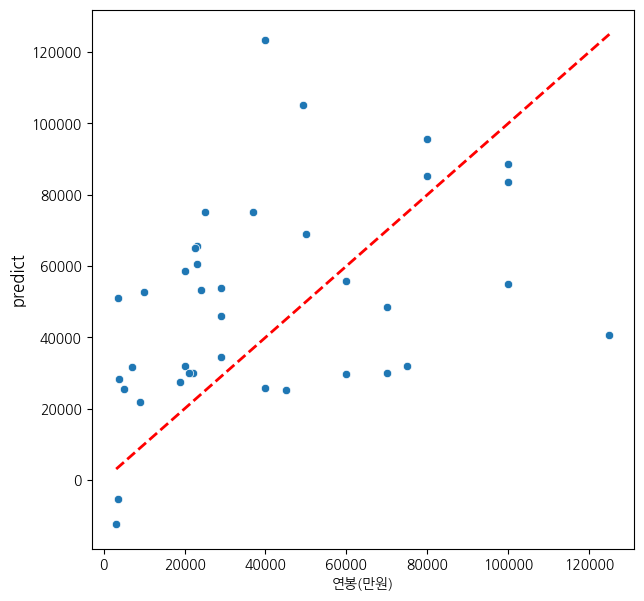

In [278]:
pred = lr_ols.predict(X_test_const)

compare_true_pred(y_test=y_test, pred=pred)

#### __❕ Feature Coefficients__

- 시각화한 결과 '이닝','실점','자책','타자', '안타', '삼진' feature 가 영향력이 커 보인다.

[Text(0, 0, 'const'),
 Text(1, 0, 'WAR'),
 Text(2, 0, 'ERA'),
 Text(3, 0, 'FIP'),
 Text(4, 0, 'WHIP'),
 Text(5, 0, 'K/9'),
 Text(6, 0, 'BB/9'),
 Text(7, 0, 'K/BB'),
 Text(8, 0, 'HR/9'),
 Text(9, 0, 'K%'),
 Text(10, 0, 'BB%'),
 Text(11, 0, 'PFR'),
 Text(12, 0, 'BABIP'),
 Text(13, 0, 'LOB%'),
 Text(14, 0, 'IP/G'),
 Text(15, 0, 'WPCT')]

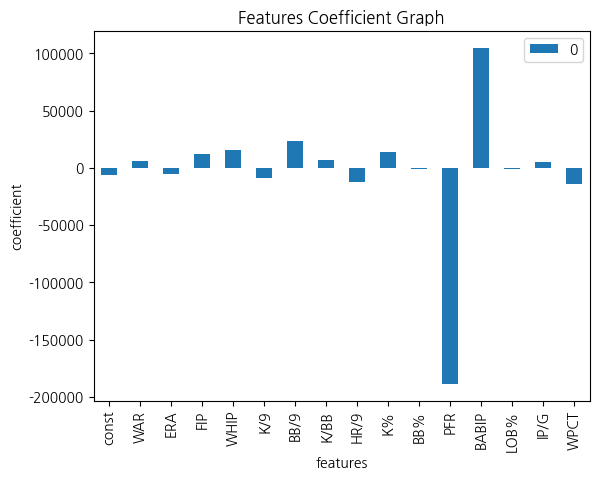

In [124]:
# 회귀 계수를 리스트로 반환한다.
coefs = lr_ols.params.to_frame()

# 변수명을 리스트로 반환한다.
x_labels = lr_ols.params.index.to_list()

# 회귀 계수를 출력한다.
ax = coefs.plot(kind='bar')
ax.set_title("Features Coefficient Graph")
ax.set_xlabel("features")
ax.set_ylabel("coefficient")
ax.set_xticklabels(x_labels)

In [ ]:
lr_ols, X_test_const = get_OLS_model(X, y2)
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 연봉(만원)   R-squared:                       0.540
Model:                            OLS   Adj. R-squared:                  0.488
Method:                 Least Squares   F-statistic:                     10.47
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.95e-16
Time:                        11:48:47   Log-Likelihood:                -1746.4
No. Observations:                 150   AIC:                             3525.
Df Residuals:                     134   BIC:                             3573.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        3.83e+04    4.9e+04      0.781      0.436   -5.86e+04    1.35e+05
WAR         8082.0855   2040.068      3.962      0.000    4047.186    1.21e+04
ERA        -5023.6838   2557.234     -1.964      0.052   -1.01e+04      34.079
FIP         3321.1303   5588.021      0.594      0.553   -7731.001    1.44e+04
WHIP        2329.3837   3.48e+04      0.067      0.947   -6.64e+04    7.11e+04
K/9        -1.342e+04   9.34e+04     -0.144      0.886   -1.98e+05    1.71e+05
BB/9        2.286e+04   9.42e+04      0.243      0.809   -1.63e+05    2.09e+05
K/BB        4739.9601   6012.273      0.788      0.432   -7151.269    1.66e+04
HR/9        -342.8314   9307.045     -0.037      0.971   -1.88e+04    1.81e+04
K%          1.108e+04   4224.526      2.622      0.010    2721.719    1.94e+04
BB%        -3960.1391   5558.605     -0.712      0.477    -1.5e+04    7033.812
PFR        -1.119e+05   8.36e+05     -0.134      0.894   -1.76e+06    1.54e+06
BABIP       1.537e+05   1.57e+05      0.982      0.328   -1.56e+05    4.63e+05
LOB%       -1207.2053    490.985     -2.459      0.015   -2178.289    -236.122
IP/G        4690.7990   1728.336      2.714      0.008    1272.452    8109.146
WPCT       -1.431e+04   1.09e+04     -1.312      0.192   -3.59e+04    7259.547
==============================================================================
Omnibus:                       38.589   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.048
Skew:                           1.062   Prob(JB):                     1.03e-20
Kurtosis:                       6.196   Cond. No.                     2.65e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.65e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

</br>

#### __❕ Linear Reg. R2 score__

In [125]:
lreg = get_linearReg(X, y2, print_R2=True)

Train R2 score : 0.4696280239528271
Test R2 score : -0.17145585218134762


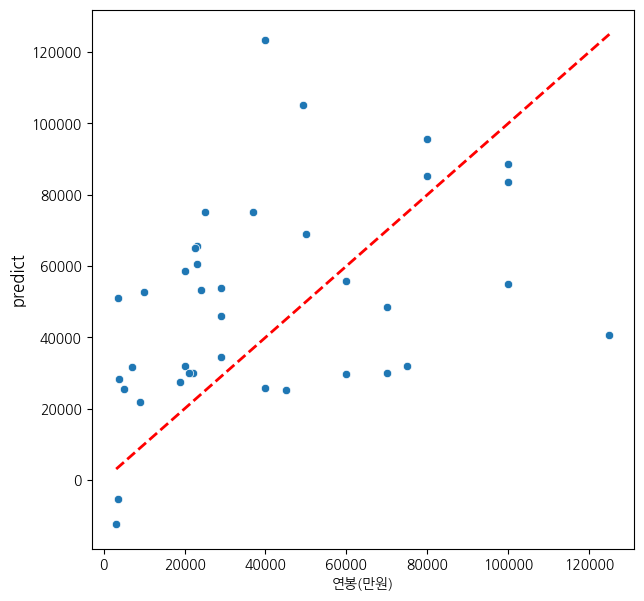

In [281]:
pred = lreg.predict(X_test)

compare_true_pred(y_test=y_test, pred=pred)

</br>

#### __❕ Linear Reg. RMSE__

In [126]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 28061.77914802567
RMSE test: 34440.43747966538


</br>

#### __❕ Feature Engineering__


- 'WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'K/BB', 'IP/G'

In [131]:
columns = ['WAR', 'ERA', 'FIP', 'WHIP', 'ERA+', 'FIP+', 'K/BB', 'IP/G']
X = X2[columns]

X_train, X_test, y_train, y_test = data_split(X, y2, shape=True)

(150, 8) (150,) (38, 8) (38,)


In [132]:
lr_ols, X_test_const = get_OLS_model(X, y2)
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 연봉(만원)   R-squared:                       0.415
Model:                            OLS   Adj. R-squared:                  0.382
Method:                 Least Squares   F-statistic:                     12.49
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.89e-13
Time:                        12:55:38   Log-Likelihood:                -1756.5
No. Observations:                 150   AIC:                             3531.
Df Residuals:                     141   BIC:                             3558.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -2.304e+04      3e+04     -0.768      0.444   -8.23e+04    3.62e+04
WAR         3235.2994   1910.540      1.693      0.093    -541.707    7012.306
ERA          458.2835   1419.397      0.323      0.747   -2347.768    3264.335
FIP          245.4977   3531.101      0.070      0.945   -6735.248    7226.243
WHIP        -239.8371    1.1e+04     -0.022      0.983   -2.19e+04    2.14e+04
ERA+         148.5386     87.102      1.705      0.090     -23.657     320.734
FIP+          82.1833    174.630      0.471      0.639    -263.048     427.415
K/BB        7578.1929   3196.155      2.371      0.019    1259.613    1.39e+04
IP/G        5788.3373   1690.400      3.424      0.001    2446.532    9130.142
==============================================================================
Omnibus:                       51.065   Durbin-Watson:                   2.126
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.380
Skew:                           1.312   Prob(JB):                     3.00e-34
Kurtosis:                       7.221   Cond. No.                     2.05e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.05e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [133]:
lreg = get_linearReg(X, y2, print_R2=True)

Train R2 score : 0.414827830609784
Test R2 score : -0.012286719064055207


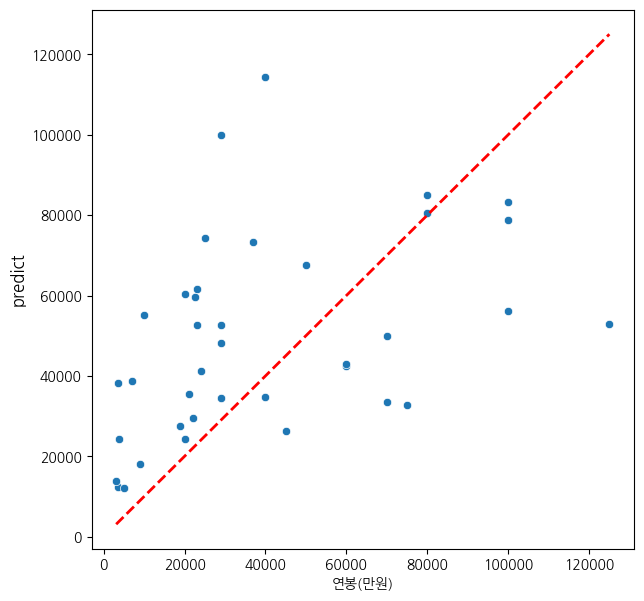

In [134]:
pred = lreg.predict(X_test)

compare_true_pred(y_test=y_test, pred=pred)

In [135]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 29475.877945998818
RMSE test: 32015.291896802435


'IP/G', 'WAR', 'WPCT'

In [136]:
columns = ['IP/G', 'WAR', 'WPCT']
X = X2[columns]

X_train, X_test, y_train, y_test = data_split(X, y2, shape=True)

(150, 3) (150,) (38, 3) (38,)


In [137]:
lr_ols, X_test_const = get_OLS_model(X, y2)
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 연봉(만원)   R-squared:                       0.323
Model:                            OLS   Adj. R-squared:                  0.309
Method:                 Least Squares   F-statistic:                     23.19
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           2.48e-12
Time:                        12:57:10   Log-Likelihood:                -1767.5
No. Observations:                 150   AIC:                             3543.
Df Residuals:                     146   BIC:                             3555.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.689e+04   5753.221      4.673      0.000    1.55e+04    3.83e+04
IP/G        2867.5620   1574.838      1.821      0.071    -244.863    5979.987
WAR         8717.1117   1588.047      5.489      0.000    5578.582    1.19e+04
WPCT       -7682.0047   1.07e+04     -0.716      0.475   -2.89e+04    1.35e+04
==============================================================================
Omnibus:                       59.777   Durbin-Watson:                   2.107
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              195.949
Skew:                           1.527   Prob(JB):                     2.82e-43
Kurtosis:                       7.693   Cond. No.                         18.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [138]:
lreg = get_linearReg(X, y2, print_R2=True)

Train R2 score : 0.32269114525194154
Test R2 score : -0.1229063455495174


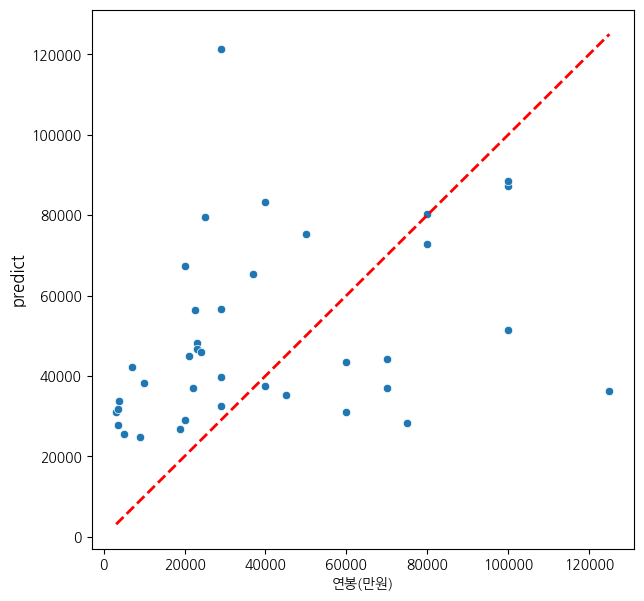

In [139]:
pred = lreg.predict(X_test)

compare_true_pred(y_test=y_test, pred=pred)

In [140]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 31711.610215356122
RMSE test: 33719.215685965


- 'WAR', 'LOB%', 'IP/G', 'K%'

In [141]:
columns = ['WAR', 'LOB%', 'IP/G', 'K%']
X = X2[columns]

X_train, X_test, y_train, y_test = data_split(X, y2, shape=True)

(150, 4) (150,) (38, 4) (38,)


In [142]:
lr_ols, X_test_const = get_OLS_model(X, y2)
lr_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 연봉(만원)   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     20.78
Date:                Mon, 18 Mar 2024   Prob (F-statistic):           1.47e-13
Time:                        12:58:24   Log-Likelihood:                -1762.7
No. Observations:                 150   AIC:                             3535.
Df Residuals:                     145   BIC:                             3551.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04   2.09e+04      0.639      0.524   -2.79e+04    5.46e+04
WAR         6972.0276   1805.739      3.861      0.000    3403.057    1.05e+04
LOB%        -346.2482    291.747     -1.187      0.237    -922.874     230.378
IP/G        4671.0138   1714.866      2.724      0.007    1281.651    8060.377
K%          1752.5688    558.720      3.137      0.002     648.280    2856.857
==============================================================================
Omnibus:                       57.791   Durbin-Watson:                   2.228
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              182.064
Skew:                           1.488   Prob(JB):                     2.92e-40
Kurtosis:                       7.503   Cond. No.                         601.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [143]:
lreg = get_linearReg(X, y2, print_R2=True)

Train R2 score : 0.36441153798173276
Test R2 score : -0.09973574460797408


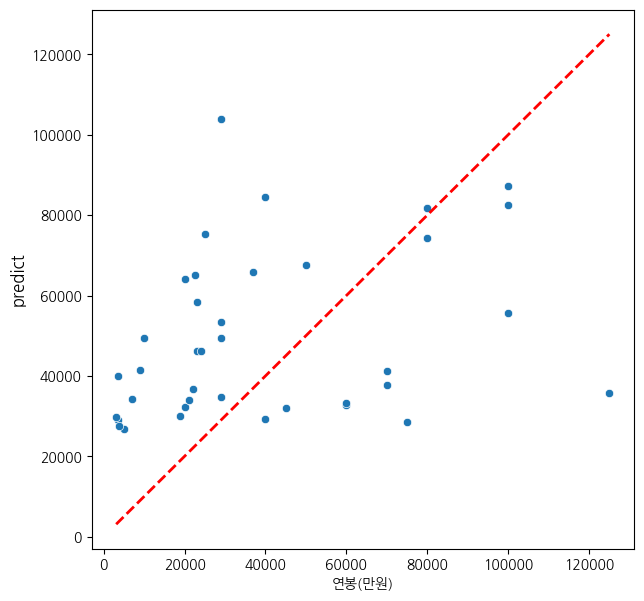

In [144]:
pred = lreg.predict(X_test)

compare_true_pred(y_test=y_test, pred=pred)

In [145]:
pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

print_RMSE(y_train, pred_train, y_test, pred_test)

RMSE train: 30719.41354031377
RMSE test: 33369.51287050635


👉 결론

- 세이버메트릭스 특성이 더 좋은 모델 성능을 보일 줄 알았는데 그렇지 못했다.

- Features에 대한 좀 더 많은 연구가 필요해 보인다.